#1. Chosen Dataset
Link to Kaggle Dataset:https://www.kaggle.com/datasets/catherinerasgaitis/mxmh-survey-results

Link to google drive: https://drive.google.com/drive/folders/1zna-1wP8FgwIzA4GDdC-0gAQt3rRXUzn?usp=sharing

Link to Colab workspace: https://colab.research.google.com/drive/1UFceVgoDQteT1E72-624Sda-PGQP02DT?usp=sharing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np # For numerical operations
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the file is in your Google Drive's My Drive folder
df = pd.read_csv('/content/drive/MyDrive/DTI 530/datasets/mxmh_survey_results.csv')
df.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


###Description
This dataset is results from a survey to see if music therapy can help with an individual's stress, mood, and overall mental health. The data is broken into two parts. The first part is information about the user and their music preferences. This includes information like when they listen to music, how they listen to music, and what genre they listen to. The second part is data about mental health, specifically data about their self-reported experiences with things such as stress, anxiety, and depression.

###Objective/Goals
I want to explore how music can contribute to individual's self reported mental health levels. Specifically we want to explore the relationship between musical preferences, how long they listen for, and where they listen to their own percieved levels of mental health.

#2. Cleaning Data

### Problem 2.1
Clean and organize the data to do the following:
Remove unnecessary / extraneous columns
Rename columns appropriately
Manage omissions, NA’s, and data types in columns (e.g., removing ‘$’s’ and NaN)


In [ ]:
# prompt: drop timestamps and permission column

# Assuming 'df' is your DataFrame
df = df.drop(['Timestamp', 'Permissions'], axis=1)
df.head()

,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,...,Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects
0,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,156.0,...,Very frequently,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN
1,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,119.0,...,Sometimes,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN
2,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,132.0,...,Rarely,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect
3,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,84.0,...,Sometimes,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve
4,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,107.0,...,Sometimes,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve


In [ ]:
#Renaming columns
df = df.rename(columns={
    'Instrumentalist': 'Plays Instrument',
    'Composer': 'Composes Music',
    'Exploratory': 'Explores new music/genres',
    'Foreign languages': 'Listens to music in non-fluent language',
    'Music effects': 'Music effects on mental health'
})
df.head()

,Age,Primary streaming service,Hours per day,While working,Plays Instrument,Composes Music,Fav genre,Explores new music/genres,Listens to music in non-fluent language,BPM,...,Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects on mental health
0,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,156.0,...,Very frequently,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN
1,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,119.0,...,Sometimes,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN
2,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,132.0,...,Rarely,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect
3,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,84.0,...,Sometimes,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve
4,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,107.0,...,Sometimes,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve


In [ ]:
#dropping NaN values in the column if music effects overall mental health conditions
df = df.dropna(subset=['Music effects on mental health'])

#fill in 0 for BPM with no value
df['BPM'] = df['BPM'].fillna(0)


#fill in unknown for missing primary streaming service
df['Primary streaming service'] = df['Primary streaming service'].fillna('unknown')

#fill in 0 for age with no value
df['Age'] = df['Age'].fillna(0)
df.head()


,Age,Primary streaming service,Hours per day,While working,Plays Instrument,Composes Music,Fav genre,Explores new music/genres,Listens to music in non-fluent language,BPM,...,Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects on mental health
2,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,132.0,...,Rarely,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect
3,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,84.0,...,Sometimes,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve
4,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,107.0,...,Sometimes,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve
5,18.0,Spotify,5.0,Yes,Yes,Yes,Jazz,Yes,Yes,86.0,...,Very frequently,Very frequently,Very frequently,Very frequently,Never,8.0,8.0,7.0,7.0,Improve
6,18.0,YouTube Music,3.0,Yes,Yes,No,Video game music,Yes,Yes,66.0,...,Rarely,Rarely,Never,Never,Sometimes,4.0,8.0,6.0,0.0,Improve


In [ ]:
# prompt: filter out outliers in BPM above 300

# Filter out outliers in BPM above 300
df = df[df['BPM'] <= 500]

#After calculating the means there were significant outliers in the data so I asked gemini to filter out

###Problem 2.2
 Explore the data by doing the following:
Apply descriptive statistics to the data, reporting:
Mean, median, mode and standard deviation for quantitative continuous data in the dataset;
Tables to report prevalence / frequency counts for quantitative discrete and qualitative data in the dataset;


In [ ]:
numerical_columns = ['Age', 'Hours per day', 'BPM', 'Anxiety', 'Depression', 'Insomnia', 'OCD' ]
#categorical_columns = ['Primary streaming service', 'Plays Instrument', 'Composes Music', 'Explores new music/genres', 'Listens language not fluent', 'Music effects']

In [ ]:
# 1. Mean for each numerical column
mean_values = df[numerical_columns].mean()

# 2. Median for each numerical column
median_values = df[numerical_columns].median()

# 3. Mode for each numerical column
mode_values = df[numerical_columns].mode().iloc[0]  # `.mode()` can return multiple values, so we take the first mode

# 4. Standard deviation for each numerical column
std_dev_values = df[numerical_columns].std()

In [ ]:
print("Mean values:\n", mean_values)
print("\nMedian values:\n", median_values)
print("\nMode values:\n", mode_values)
print("\nStandard Deviation values:\n", std_dev_values)

Mean values:
 Age               25.133609
Hours per day      3.586157
BPM              105.055096
Anxiety            5.854683
Depression         4.796143
Insomnia           3.751377
OCD                2.643251
dtype: float64

Median values:
 Age               21.0
Hours per day      3.0
BPM              115.0
Anxiety            6.0
Depression         5.0
Insomnia           3.0
OCD                2.0
dtype: float64

Mode values:
 Age              18.0
Hours per day     2.0
BPM               0.0
Anxiety           7.0
Depression        7.0
Insomnia          0.0
OCD               0.0
Name: 0, dtype: float64

Standard Deviation values:
 Age              11.963049
Hours per day     3.040065
BPM              53.276893
Anxiety           2.789616
Depression        3.024801
Insomnia          3.094238
OCD               2.847649
dtype: float64


In [ ]:
def mean_exclude_zero(series):
    # Filter out zeros
    non_zero_series = series[series != 0]
    if not non_zero_series.empty:
        # Return the first mode after excluding zeros
        return non_zero_series.mean()
    else:
        return None  # In case all values are 0

# Apply the function to each numerical column
mean_values_excluding_zeros = df[numerical_columns].apply(mean_exclude_zero)

print("Mean values excluding zeros:\n", mean_values_excluding_zeros)

def median_exclude_zero(series):
    # Filter out zeros
    non_zero_series = series[series != 0]
    if not non_zero_series.empty:
        # Return the first mode after excluding zeros
        return non_zero_series.median()
    else:
        return None  # In case all values are 0

# Apply the function to each numerical column
median_values_excluding_zeros = df[numerical_columns].apply(median_exclude_zero)

print("Median values excluding zeros:\n", median_values_excluding_zeros)

# Function to calculate mode excluding zeros
def mode_exclude_zero(series):
    # Filter out zeros
    non_zero_series = series[series != 0]
    if not non_zero_series.empty:
        # Return the first mode after excluding zeros
        return non_zero_series.mode().iloc[0]
    else:
        return None  # In case all values are 0

# Apply the function to each numerical column
mode_values_excluding_zeros = df[numerical_columns].apply(mode_exclude_zero)

print("Mode values excluding zeros:\n", mode_values_excluding_zeros)

def std_exclude_zero(series):
    # Filter out zeros
    non_zero_series = series[series != 0]
    if not non_zero_series.empty:
        # Return the first mode after excluding zeros
        return non_zero_series.std()
    else:
        return None  # In case all values are 0

# Apply the function to each numerical column
std_values_excluding_zeros = df[numerical_columns].apply(std_exclude_zero)

print("Standard Deviation values excluding zeros:\n", std_values_excluding_zeros)



Mean values excluding zeros:
 Age               25.168276
Hours per day      3.616042
BPM              123.214863
Anxiety            6.142341
Depression         5.415241
Insomnia           4.711938
OCD                3.981328
dtype: float64
Median values excluding zeros:
 Age               21.0
Hours per day      3.0
BPM              120.0
Anxiety            7.0
Depression         6.0
Insomnia           4.0
OCD                3.0
dtype: float64
Mode values excluding zeros:
 Age               18.0
Hours per day      2.0
BPM              120.0
Anxiety            7.0
Depression         7.0
Insomnia           2.0
OCD                2.0
dtype: float64
Standard Deviation values excluding zeros:
 Age              11.934760
Hours per day     3.034948
BPM              32.995401
Anxiety           2.528915
Depression        2.640928
Insomnia          2.737913
OCD               2.623788
dtype: float64


In [ ]:
# prompt: create a professional table that shows the number of people who are no effect and the number that are improve for music effect

# Count the number of people for each music effect category
music_effect_counts = df['Music effects on mental health'].value_counts()

# Create a table with "No effect" and "Improve" counts
table_data = {
    'Music Effect': ['No effect', 'Improve'],
    'Count': [music_effect_counts.get('No effect', 0), music_effect_counts.get('Improve', 0)]
}

effect_table = pd.DataFrame(table_data)

# Display the table with a professional look
print("Music Effect on Mental Health")
print("-" * 30)
print(effect_table.to_string(index=False))

#I used gemini here to help create tables for the quantitative and qualitative data. It did not always work perfectly and I had to troubleshoot things such as variables and appearances.

Music Effect on Mental Health
------------------------------
Music Effect  Count
   No effect    168
     Improve    541


In [ ]:
# prompt: create a professional table that shows the count of peoples responses for all the columns that start with frequency

frequency_columns = [col for col in df.columns if col.startswith('Frequency')]

# Create an empty dictionary to store the counts
frequency_counts = {}

# Loop through the columns that start with "Frequency"
for column in frequency_columns:
  # Get the value counts for each column and add them to the dictionary
  frequency_counts[column] = df[column].value_counts().to_dict()

# Convert the dictionary to a pandas DataFrame
frequency_counts_df = pd.DataFrame(frequency_counts)

# Transpose the DataFrame to get a better view of the data
frequency_counts_df = frequency_counts_df.T

# Rename the columns for better readability
frequency_counts_df = frequency_counts_df.rename(
    columns={
        'Never': 'Never',
        'Rarely': 'Rarely',
        'Sometimes': 'Sometimes',
        'Often': 'Often',
        'Always': 'Always'
    }
)

# Display the table with a professional look
print("Frequency that each music genre is listened to")
print("-" * 60)
print(frequency_counts_df.fillna(0).astype(int).to_string())
#I used gemini here to help create tables for the quantitative and qualitative data. It did not always work perfectly and I had to troubleshoot things such as variables and appearances.

Frequency that each music genre is listened to
------------------------------------------------------------
                              Rarely  Sometimes  Never  Very frequently
Frequency [Classical]            255        196    167              108
Frequency [Country]              230        109    338               49
Frequency [EDM]                  193        144    302               87
Frequency [Folk]                 217        144    289               76
Frequency [Gospel]               133         50    529               14
Frequency [Hip hop]              210        216    178              122
Frequency [Jazz]                 244        174    256               52
Frequency [K pop]                174         67    412               73
Frequency [Latin]                171         86    437               32
Frequency [Lofi]                 207        158    276               85
Frequency [Metal]                191        132    258              145
Frequency [Pop]             

In [ ]:
# prompt: create a professional table that shows the number of people who use each streaming service

streaming_service_counts = df['Primary streaming service'].value_counts()

# Create a table with streaming service and count
table_data = {
    'Streaming Service': streaming_service_counts.index,
    'Number of Users': streaming_service_counts.values
}

streaming_table = pd.DataFrame(table_data)

# Display the table with a professional look
print("Streaming Service User Counts")
print("-" * 30)
print(streaming_table.to_string(index=False))
#I used gemini here to help create tables for the quantitative and qualitative data. It did not always work perfectly and I had to troubleshoot things such as variables and appearances.

Streaming Service User Counts
------------------------------
                Streaming Service  Number of Users
                          Spotify              454
                    YouTube Music               93
I do not use a streaming service.               70
                      Apple Music               50
          Other streaming service               48
                          Pandora               10
                          unknown                1


In [ ]:
# prompt: create a professional table that shows who play an instrument, compose music, or listen to music not fluent

# Assuming the actual column name is 'Foreign languages', correct the code
table_data = {
    'Category': ['Plays Instrument', 'Composes Music', 'Listens to music in non-fluent language'],
    'Yes': [
        df['Plays Instrument'].apply(lambda x: 1 if x == 'Yes' else 0).sum(),  # Count 'Yes' as 1, others as 0
        df['Composes Music'].apply(lambda x: 1 if x == 'Yes' else 0).sum(),    # Count 'Yes' as 1, others as 0
        df['Listens to music in non-fluent language'].apply(lambda x: 1 if x == 'Yes' else 0).sum() # Count 'Yes' as 1, others as 0 # Corrected column name
    ],
    'No': [
        len(df) - df['Plays Instrument'].apply(lambda x: 1 if x == 'Yes' else 0).sum(),  # Subtract 'Yes' count from total
        len(df) - df['Composes Music'].apply(lambda x: 1 if x == 'Yes' else 0).sum(),    # Subtract 'Yes' count from total
        len(df) - df['Listens to music in non-fluent language'].apply(lambda x: 1 if x == 'Yes' else 0).sum() # Subtract 'Yes' count from total # Corrected column name
    ]
}

musical_activity_table = pd.DataFrame(table_data)

# Display the table with a professional look
print("Musical Activities")
print("-" * 30)
print(musical_activity_table.to_string(index=False))
#I used gemini here to help create tables for the quantitative and qualitative data. It did not always work perfectly and I had to troubleshoot things such as variables and appearances.

Musical Activities
------------------------------
                               Category  Yes  No
                       Plays Instrument  232 494
                         Composes Music  125 601
Listens to music in non-fluent language  399 327


In [ ]:
# prompt: create a professional table that shows favorite music genre from the fav genre column

# Assuming 'fav genre' is the column containing favorite music genres
fav_genre_counts = df['Fav genre'].value_counts()

# Create a table with genre and count
table_data = {
    'Favorite Music Genre': fav_genre_counts.index,
    'Number of Users': fav_genre_counts.values
}

fav_genre_table = pd.DataFrame(table_data)

# Display the table with a professional look
print("Favorite Music Genre Counts")
print("-" * 30)
print(fav_genre_table.to_string(index=False))
#I used gemini here to help create tables for the quantitative and qualitative data. It did not always work perfectly and I had to troubleshoot things such as variables and appearances.

Favorite Music Genre Counts
------------------------------
Favorite Music Genre  Number of Users
                Rock              186
                 Pop              114
               Metal               88
           Classical               53
    Video game music               43
                 R&B               35
                 EDM               35
             Hip hop               35
                Folk               29
             Country               25
               K pop               23
                 Rap               22
                Jazz               20
                Lofi               10
              Gospel                6
               Latin                2


In [ ]:
# prompt: create a professional table that shows if they explore new music or not

# Create a table to show if they explore new music or not
explore_music_counts = df['Explores new music/genres'].value_counts()

# Create a table with "Yes" and "No" counts
table_data = {
    'Explore New Music': ['Yes', 'No'],
    'Count': [explore_music_counts.get('Yes', 0), explore_music_counts.get('No', 0)]
}

explore_music_table = pd.DataFrame(table_data)

# Display the table with a professional look
print("Exploring New Music")
print("-" * 30)
print(explore_music_table.to_string(index=False))
#I used gemini here to help create tables for the quantitative and qualitative data. It did not always work perfectly and I had to troubleshoot things such as variables and appearances.

# You can further customize the table by adding borders, styling, etc.
# For example, you can use HTML or Markdown to create a visually appealing table in your output.

Exploring New Music
------------------------------
Explore New Music  Count
              Yes    519
               No    207


In [ ]:
# prompt: create frequency table of discrete quantitative data

# Create a frequency table for 'Hours per day'
hours_per_day_counts = df['Hours per day'].value_counts().sort_index()

# Display the frequency table
print("Frequency Table for Hours per day")
print("-" * 30)
print(hours_per_day_counts.to_string())

# Create a frequency table for 'BPM'
bpm_counts = df['BPM'].value_counts().sort_index()

# Display the frequency table
print("\nFrequency Table for BPM")
print("-" * 30)
print(bpm_counts.to_string())


# Create a frequency table for 'Anxiety'
anxiety_counts = df['Anxiety'].value_counts().sort_index()

# Display the frequency table
print("\nFrequency Table for Anxiety")
print("-" * 30)
print(anxiety_counts.to_string())

# Create a frequency table for 'Depression'
depression_counts = df['Depression'].value_counts().sort_index()

# Display the frequency table
print("\nFrequency Table for Depression")
print("-" * 30)
print(depression_counts.to_string())


# Create a frequency table for 'Insomnia'
insomnia_counts = df['Insomnia'].value_counts().sort_index()

# Display the frequency table
print("\nFrequency Table for Insomnia")
print("-" * 30)
print(insomnia_counts.to_string())

# Create a frequency table for 'OCD'
ocd_counts = df['OCD'].value_counts().sort_index()

# Display the frequency table
print("\nFrequency Table for OCD")
print("-" * 30)
print(ocd_counts.to_string())
#I used gemini here to help create tables for the quantitative and qualitative data. It did not always work perfectly and I had to troubleshoot things such as variables and appearances.

Frequency Table for Hours per day
------------------------------
Hours per day
0.00       6
0.10       1
0.25       3
0.50      20
0.70       1
1.00     115
1.50      15
2.00     171
2.50       6
3.00     118
4.00      82
4.50       1
5.00      54
6.00      47
7.00      14
8.00      29
9.00       3
10.00     20
11.00      1
12.00      9
13.00      1
14.00      1
15.00      2
16.00      1
18.00      1
20.00      1
24.00      3

Frequency Table for BPM
------------------------------
BPM
0.0      107
4.0        1
8.0        1
20.0       1
40.0       1
52.0       1
55.0       2
56.0       1
60.0       2
61.0       1
62.0       1
63.0       1
66.0       3
68.0       1
70.0       3
72.0       5
73.0       2
75.0       3
76.0       3
77.0       5
78.0       3
79.0       3
80.0      11
81.0       4
82.0       1
84.0       5
85.0       9
86.0       4
87.0       3
88.0       2
89.0       6
90.0      11
91.0       5
92.0       7
93.0       7
94.0       4
95.0      10
96.0       4
97.0       6
98.

###Problem 2.3
Explore the data visually by doing the following:
Develop at least three visualizations to describe the data in ways that are important to the objectives outlined in Problem 1.1.
Ensure these visualizations are legible, have appropriate axes title and scales, and include appropriate interpretation (legend and/or caption)


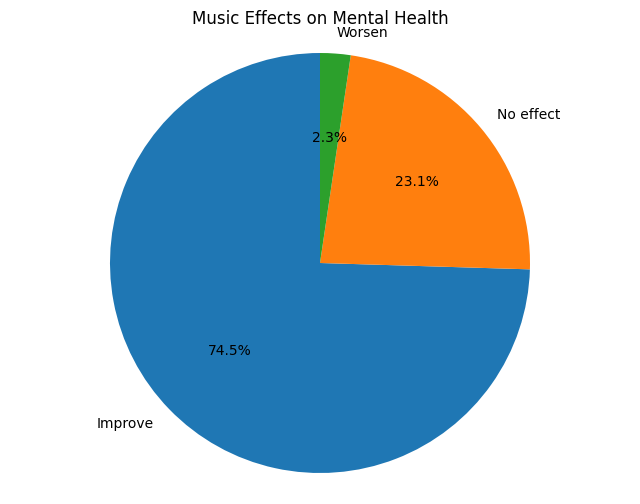

In [ ]:
# prompt: create a pie chart of the music effects on mental health using seaborn

# Calculate the counts of each music effect category
music_effect_counts = df['Music effects on mental health'].value_counts()

# Create a pie chart using Seaborn
plt.figure(figsize=(8, 6))
plt.pie(music_effect_counts, labels=music_effect_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Music Effects on Mental Health')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


#I had the ideas for making the visualizations I just did not know how to produce them so I had gemini help me with it and troubleshot as needed with variable names and appearances.

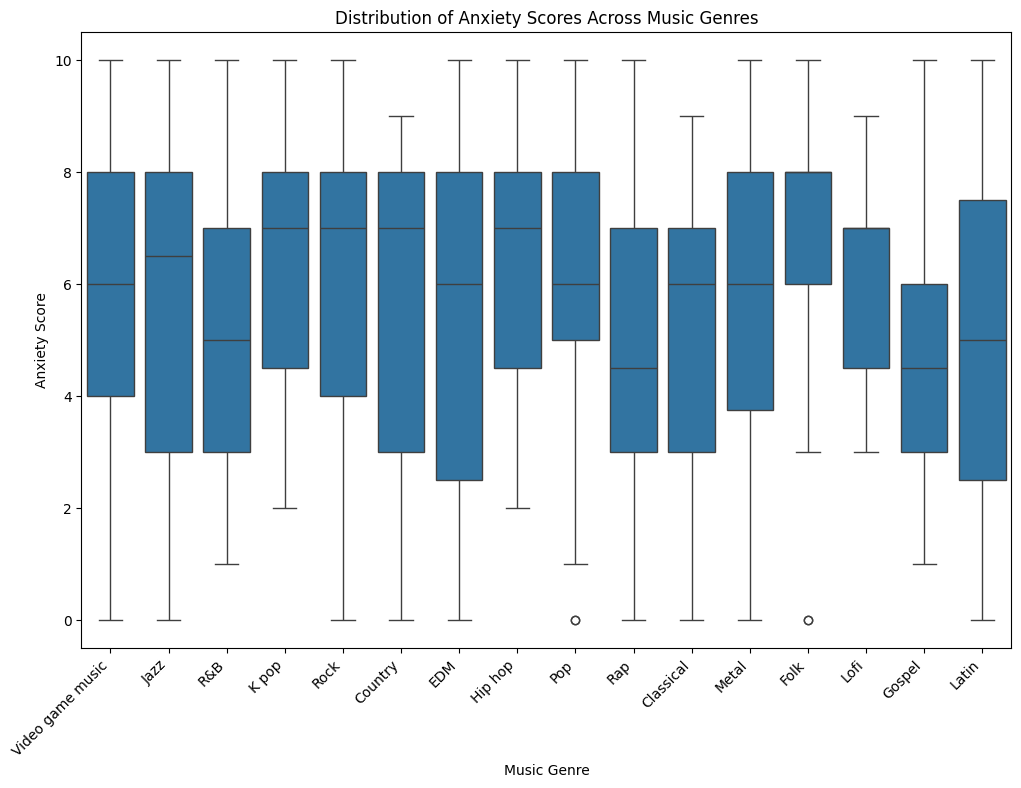

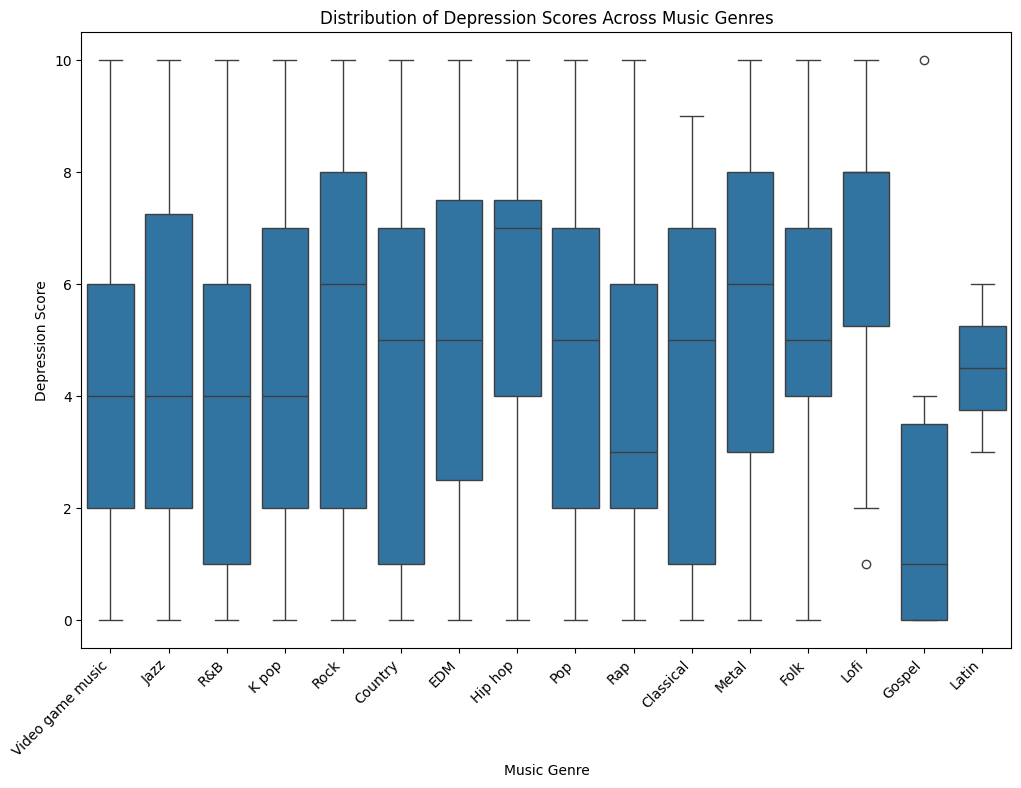

In [ ]:
# prompt: Show the relationship between different music genres and self-reported mental health scores for anxiety and depression

# Create a boxplot to show the distribution of anxiety scores for different music genres
plt.figure(figsize=(12, 8))
sns.boxplot(x='Fav genre', y='Anxiety', data=df)
plt.title('Distribution of Anxiety Scores Across Music Genres')
plt.xlabel('Music Genre')
plt.ylabel('Anxiety Score')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

# Create a boxplot to show the distribution of depression scores for different music genres
plt.figure(figsize=(12, 8))
sns.boxplot(x='Fav genre', y='Depression', data=df)
plt.title('Distribution of Depression Scores Across Music Genres')
plt.xlabel('Music Genre')
plt.ylabel('Depression Score')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()
#I had the ideas for making the visualizations I just did not know how to produce them so I had gemini help me with it and troubleshot as needed with variable names and appearances.

Correlation Matrix:
               Hours per day   Anxiety  Depression  Insomnia       OCD
Hours per day       1.000000  0.047978    0.108065  0.137687  0.118128
Anxiety             0.047978  1.000000    0.518669  0.288394  0.346764
Depression          0.108065  0.518669    1.000000  0.374978  0.191831
Insomnia            0.137687  0.288394    0.374978  1.000000  0.224141
OCD                 0.118128  0.346764    0.191831  0.224141  1.000000


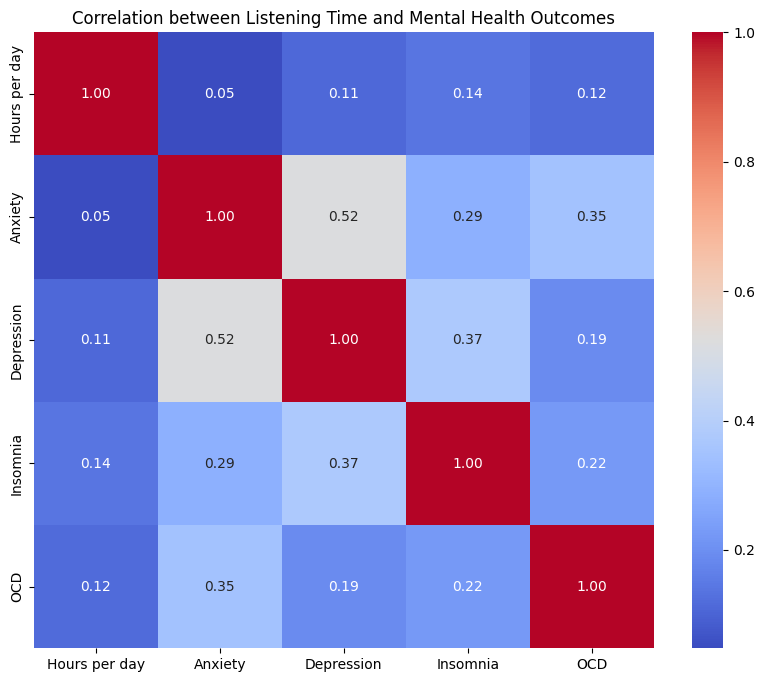

Correlation between Listening Time and Anxiety: 0.05
Correlation between Listening Time and Depression: 0.11
Correlation between Listening Time and Insomnia: 0.14
Correlation between Listening Time and OCD: 0.12


In [ ]:
# prompt: Analyze the correlation between the amount of time respondents spend listening to music and their self-reported mental health outcomes

# Calculate the correlation between listening time and mental health outcomes
correlation_matrix = df[['Hours per day', 'Anxiety', 'Depression', 'Insomnia','OCD']].corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Create a heatmap to visualize the correlation
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between Listening Time and Mental Health Outcomes')
plt.show()

# You can also calculate individual correlations and analyze them separately
correlation_listening_anxiety = df['Hours per day'].corr(df['Anxiety'])
correlation_listening_depression = df['Hours per day'].corr(df['Depression'])
correlation_listening_insomnia = df['Hours per day'].corr(df['Insomnia'])
correlation_listening_OCD = df['Hours per day'].corr(df['OCD'])

print(f"Correlation between Listening Time and Anxiety: {correlation_listening_anxiety:.2f}")
print(f"Correlation between Listening Time and Depression: {correlation_listening_depression:.2f}")
print(f"Correlation between Listening Time and Insomnia: {correlation_listening_insomnia:.2f}")
print(f"Correlation between Listening Time and OCD: {correlation_listening_OCD:.2f}")
#I had the ideas for making the visualizations I just did not know how to produce them so I had gemini help me with it and troubleshot as needed with variable names and appearances.

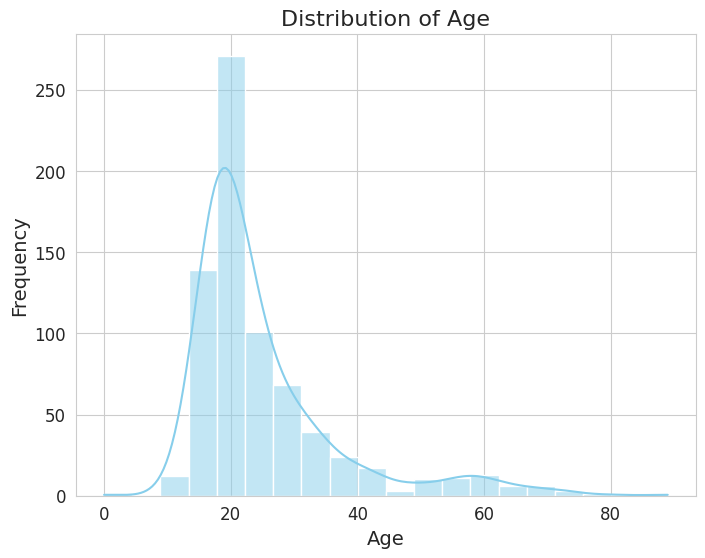

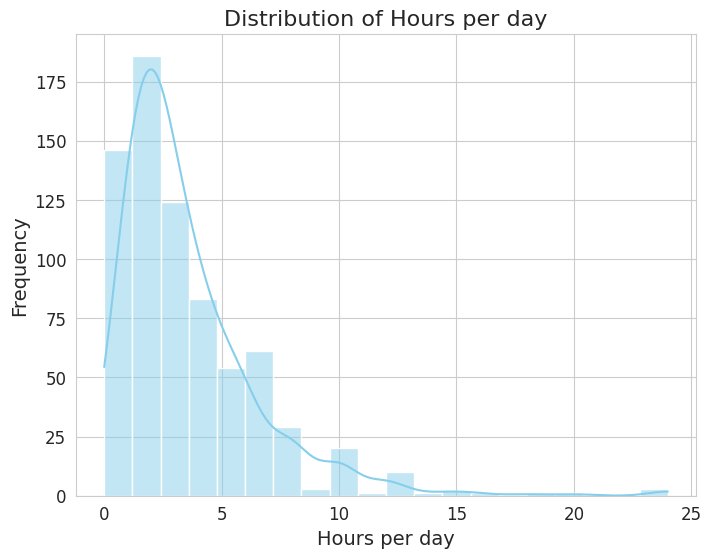

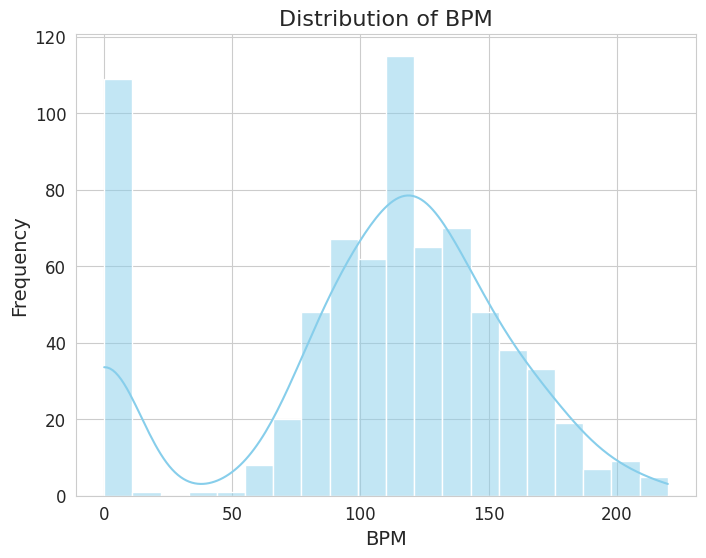

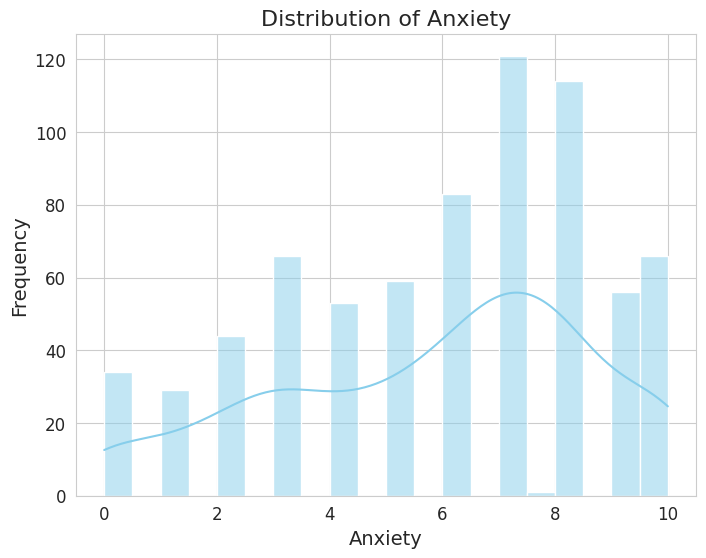

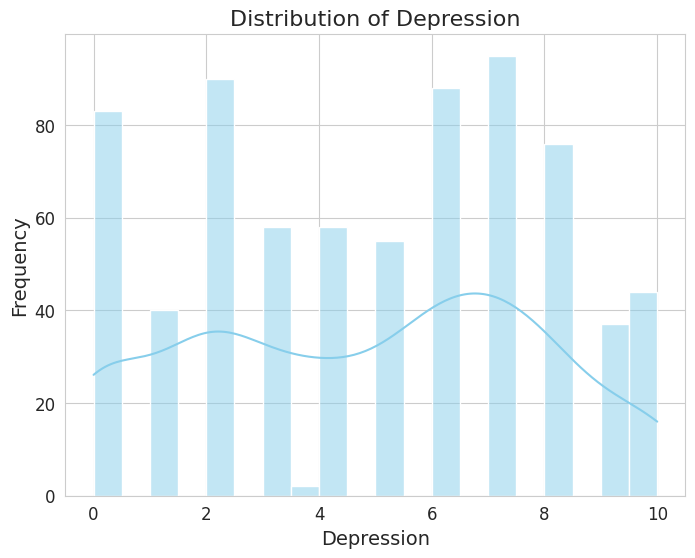

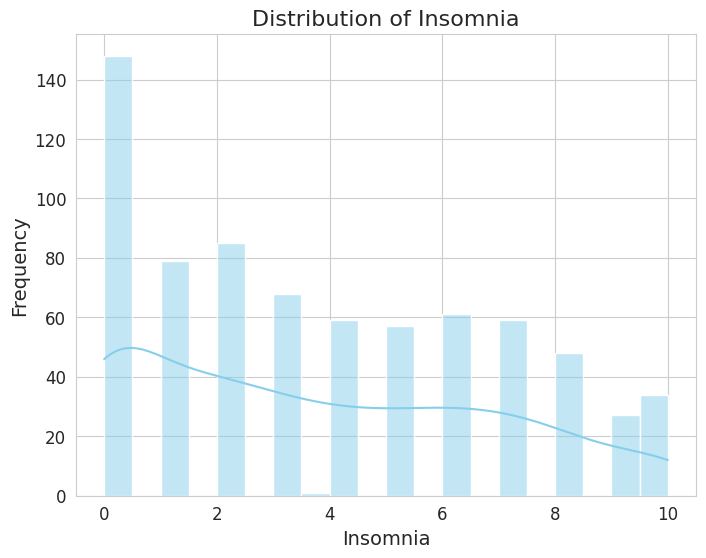

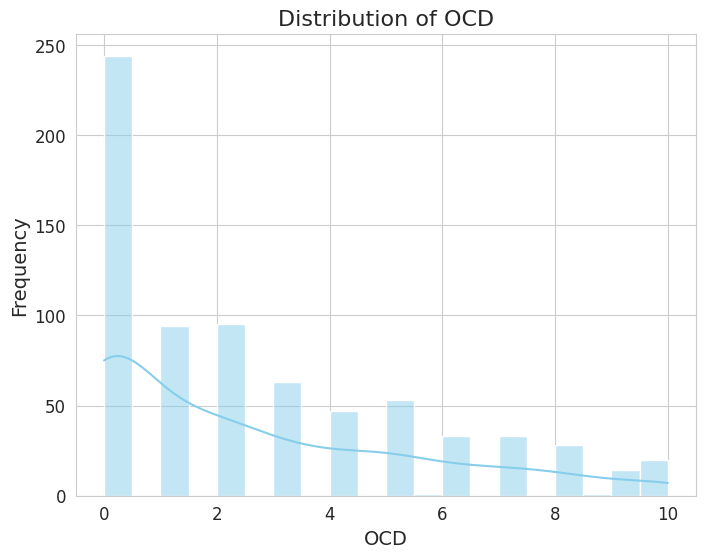

In [ ]:
# prompt: create professional looking histograms to describe the data

# Create histograms for numerical variables with professional aesthetics

# Set the style for the plots
sns.set_style("whitegrid")

# Define the numerical columns to create histograms for
numerical_columns = ['Age', 'Hours per day', 'BPM', 'Anxiety', 'Depression', 'Insomnia', 'OCD']


for column in numerical_columns:
  plt.figure(figsize=(8, 6))  # Set the figure size
  sns.histplot(df[column], kde=True, bins=20, color='skyblue')  # Create the histogram with KDE
  plt.title(f'Distribution of {column}', fontsize=16)  # Set title
  plt.xlabel(column, fontsize=14)  # Set x-axis label
  plt.ylabel('Frequency', fontsize=14)  # Set y-axis label
  plt.xticks(fontsize=12)  # Adjust x-axis tick font size
  plt.yticks(fontsize=12)  # Adjust y-axis tick font size
  plt.show()

  #I had the ideas for making the visualizations I just did not know how to produce them so I had gemini help me with it and troubleshot as needed with variable names and appearances.


# You can customize these histograms further based on your specific needs:
# - Change colors using the 'color' parameter.
# - Adjust the number of bins with the 'bins' parameter.
# - Add a rug plot using the 'rug' parameter.
# - Customize labels and titles with the 'xlabel', 'ylabel', and 'title' parameters.
# - Change the font sizes and styles for better readability.

###Problem 2.4
If we look solely at the histograms for the quantitative data there is widespread of distributions. The OCD and hour per day distributions, apear to be right-skewed. The insomnia and age distributions are slightly right-skewed. This means the histogram tail extends to the right and the mode is closer to the left side. In these cases the mean is usually greater than the median and this is greater than the mode. The distibution of depression appears to be relatively bimodal and anxiety does not have a defined shape. The beats per minute is relatively normal with one outlier at 0 which probably means that there was no number 0 was placed and accounted for in the histogram. The standard deviation is relatively small for all the quantitative data with the biggest being roughly 32 for BPM. This makes sense with variance in genres that have different BPM.

The other visualizations shed light on the objective/goal of the data more. The pie chart shows that people self-reported that their mental health improves when they listen to music. The box plot shows the self-reported anxiety and depression scores compared to the individuals favorite genre of music. Lastly, the heat map shows the relationship between the hours per day listening to the music compared to the mental health affect it could have. In the correlation heat map, 1 is a perfect positive correlation and -1 is perfect negative correlation.

After cleaning the data source seems to be legitimate. There were only a few places with significant outliers that were noticed after doing descriptive statistics. One of these being an outlier of 999,999,999 bpm in the bpm category which was messing up all the data.

After looking at the data a few things seem to be implied. A majority of people believe that listening to music improves their mental health. The beats per minute of individuals favorite genre appear to be between 100 and 150 bpm. Looking at the boxplot, people who listen to hip-hop, rock, and metal have higher mean depression scores compared to other genres. Whereas for anxiety scores, country, rock, k-pop, and hip-hop have the highest mean scores but are all relatively similar. Lastly, looking at the correlation heat map there does not seem to be obvious relationships between hours per day listening and mental health effects. These are a few of the implications can be made based on these visualizations.

#Problem 3
###Problem 3.1



##Inference Test 1
H01: There is no difference in anxiety levels for people who listen to music while wokring compared to those who don't listen to music while working.

Type I error: A difference is found between anxiety levels for those who listen to music while working compared to those who don't when there is not actually a difference.

Type II error: A difference in anxiety levels between listening to music at work and not listening to music is not found but there is a difference.

Test: Mean test of two groups. Splitting into two groups and looking at means. If normal then Welch's T-test and if non-normal it will be Mann Whitney U Test

Study Power: I will keep to usual convention and do a study power of 80.

Significance Level: Similar to Study Power I will stick with the usual convention of 95.

MDE: See code below for calculation


In [ ]:
# prompt: calculate number of participants in the study

# Assuming 'df' is your DataFrame and it contains a column indicating whether participants listen to music while working
# and a column representing their anxiety levels.

import pandas as pd
from scipy import stats
import statsmodels.stats.power as smp

# Example: Assuming 'Music_while_working' column has values like "Yes" or "No"
# and 'Anxiety' column has numerical anxiety scores.

# Separate data into two groups (those listening to music and those not)
group1 = df[df['While working'] == "Yes"]['Anxiety']
group2 = df[df['While working'] == "No"]['Anxiety']


# Calculate the means and standard deviations of the two groups
mean1 = group1.mean()
std1 = group1.std()
n1 = len(group1)

mean2 = group2.mean()
std2 = group2.std()
n2 = len(group2)

# Calculate the effect size (Cohen's d)
pooled_std_dev = ((n1-1) * std1**2 + (n2-1) * std2**2)/(n1 + n2 - 2)
effect_size = (mean1 - mean2) / (pooled_std_dev)

# Calculate Minimum Detectable Effect (MDE) for given parameters
alpha = 0.05  # Significance level
power = 0.8   # Desired power

# Instead of calculating MDE (which requires one parameter to be None),
# let's calculate the total number of participants in the study:

total_participants = n1 + n2  # Sum the participants in both groups

print(f"Total number of participants in the study: {total_participants}")

# If you still want to calculate the MDE, you need to specify one of the parameters (like effect_size, power, or alpha) as None:
# For example, to solve for effect_size given power and alpha:
# mde = smp.tt_ind_solve_power(nobs1=n1, alpha=alpha, power=power, ratio=n2/n1, alternative='two-sided')
# print(f"Minimum Detectable Effect (MDE): {mde}")

#Used AI to solved for MDE because needed equation because not a proportion test. You can see the prompt at the beginning of the paragraph.


Total number of participants in the study: 724


In [ ]:
# prompt: calculate the MDE

# Calculate the effect size (Cohen's d)
pooled_std_dev = np.sqrt(((n1 - 1) * std1**2 + (n2 - 1) * std2**2) / (n1 + n2 - 2))
effect_size = (mean1 - mean2) / pooled_std_dev

# Calculate Minimum Detectable Effect (MDE) for given parameters
alpha = 0.05  # Significance level
power = 0.8   # Desired power

# Use tt_ind_solve_power to calculate MDE
mde = smp.tt_ind_solve_power(effect_size=None, nobs1=n1, alpha=alpha, power=power, ratio=n2/n1, alternative='two-sided')

print(f"Minimum Detectable Effect (MDE) of inference test 1: {mde}")

#Used AI to solved for MDE because needed equation because not a proportion test. You can see the prompt at the beginning of the paragraph.

Minimum Detectable Effect (MDE) of inference test 1: 0.25538015783680096


##Inference Test 2
HO2: Whether someones favorite genre is classical music or not has no affect on whether they think music improves their mental health.

Type I Error: There isn't a difference whether someone listens to classical music improving their mental health but a difference is found.

Type II Error: No difference is found whether mental health is improved while listening to classical music but there is a difference.

Test: It is a test of multiple proportions because we are finding the proportion of improved, no effect, and worsen to if their favorite genre is classical music. So it would be chi-squared test.

Study Power: Usual convention so study power of 80.

Significance Level: Usual convention so 95.

MDE: Using Evan's Awesome A/B Testing and a baseline conversion rate of roughly 20% and a sample size of 726 the minimum detectable effect was found to be roughly 6% with a sample size of 719. We made sure the sample size was below the actual sample size of 726


#Inference Test 3
H03: People who listen to more than 3 hours of music a day have the same level of anxiety compared to those who listen to music for less thann 3 hours a day.

Type I Error: There isn't a difference in anxiety levels for those who listen to music for man than 3 hours but a difference is found.

Type II Error: No difference is found between anxiety levels and number of hours listened to music but there actually is a difference.

Test: It is a mean test of two groups. We want to look at the mean of people listening to music and the level of their self reported anxiety. If it is normally distributed then we would do a Welch T-Test and if it is non-normal then a Mann Whitney U Test.

Study Power: Usual convention so study power of 80.

Significance Level: Usual convention so 95.

MDE: See code below for calculation

In [ ]:
# prompt: calculate number of participants in the study and MDE for inference test 3

# Assuming 'df' is your DataFrame and it contains a column 'Hours per day' and 'Anxiety'

# Separate data into two groups (those listening to more than 3 hours and those listening to less than 3 hours)
group1 = df[df['Hours per day'] > 3]['Anxiety']
group2 = df[df['Hours per day'] <= 3]['Anxiety']

# Calculate the means and standard deviations of the two groups
mean1 = group1.mean()
std1 = group1.std()
n1 = len(group1)

mean2 = group2.mean()
std2 = group2.std()
n2 = len(group2)

# Calculate the effect size (Cohen's d)
pooled_std_dev = np.sqrt(((n1 - 1) * std1**2 + (n2 - 1) * std2**2) / (n1 + n2 - 2))
effect_size = (mean1 - mean2) / pooled_std_dev

# Calculate Minimum Detectable Effect (MDE) for given parameters
alpha = 0.05  # Significance level
power = 0.8   # Desired power

# Use tt_ind_solve_power to calculate MDE
mde = smp.tt_ind_solve_power(effect_size=None, nobs1=n1, alpha=alpha, power=power, ratio=n2/n1, alternative='two-sided')

print(f"Minimum Detectable Effect (MDE) for Inference Test 3: {mde}")

total_participants = n1 + n2
print(f"Total number of participants in the study: {total_participants}")

#Used AI to solved for MDE because needed equation because not a proportion test. You can see the prompt at the beginning of the paragraph.

Minimum Detectable Effect (MDE) for Inference Test 3: 0.21575759526172703
Total number of participants in the study: 724


###Problem 3.2
Prepare for tests.
While we will perform tests assuming normality given the central limit theorem, apply the Shapiro-Wilk test to determine the normality of the data you’re examining.


##Inference Test 1

In [ ]:
# prompt: create a visualization for people that listen to music while working and their anxiety levels

from scipy.stats import shapiro

# Assuming 'Anxiety' is the column for anxiety levels and 'Listens to music while working' is a column indicating whether they listen to music while working (e.g., Yes/No)

# Separate the data into two groups based on whether they listen to music while working
anxiety_music_listeners = df.loc[df['While working'] == 'Yes', 'Anxiety']
anxiety_no_music_listeners = df.loc[df['While working'] == 'No', 'Anxiety']

# Perform the Shapiro-Wilk test for normality on each group
statistic_music, p_value_music = shapiro(anxiety_music_listeners)
statistic_no_music, p_value_no_music = shapiro(anxiety_no_music_listeners)

print("Shapiro-Wilk test for anxiety levels in music listeners:")
print(f"Statistic: {statistic_music:.3f}, p-value: {p_value_music:.3f}")

print("\nShapiro-Wilk test for anxiety levels in non-music listeners:")
print(f"Statistic: {statistic_no_music:.3f}, p-value: {p_value_no_music:.3f}")


# Interpret the results (p-value < 0.05 indicates a significant departure from normality)
alpha = 0.05  # Significance level
if p_value_music < alpha:
  print("\nAnxiety levels in music listeners are significantly different from a normal distribution.")
else:
  print("\nAnxiety levels in music listeners do not show significant departure from a normal distribution.")

if p_value_no_music < alpha:
  print("\nAnxiety levels in non-music listeners are significantly different from a normal distribution.")
else:
  print("\nAnxiety levels in non-music listeners do not show significant departure from a normal distribution.")


#Used AI to run to test for normality . You can see the prompt at the beginning of the paragraph.


Shapiro-Wilk test for anxiety levels in music listeners:
Statistic: 0.943, p-value: 0.000

Shapiro-Wilk test for anxiety levels in non-music listeners:
Statistic: 0.939, p-value: 0.000

Anxiety levels in music listeners are significantly different from a normal distribution.

Anxiety levels in non-music listeners are significantly different from a normal distribution.


##Inference Test 2
Can't test for normality with proportions test.

#Inference Test 3

In [ ]:
# prompt: compare number of hours listening to music compared to anxiety levels and test for normality

# Assuming 'Anxiety' is the column for anxiety levels and 'Hours per day' is the column indicating hours of listening
# Separate the data into two groups based on listening hours (e.g., more than 3 hours vs. less than 3 hours)
anxiety_more_than_3_hours = df.loc[df['Hours per day'] > 3, 'Anxiety']
anxiety_less_than_3_hours = df.loc[df['Hours per day'] <= 3, 'Anxiety']

# Perform the Shapiro-Wilk test for normality on each group
statistic_more_than_3, p_value_more_than_3 = shapiro(anxiety_more_than_3_hours)
statistic_less_than_3, p_value_less_than_3 = shapiro(anxiety_less_than_3_hours)

print("Shapiro-Wilk test for anxiety levels in those who listen more than 3 hours:")
print(f"Statistic: {statistic_more_than_3:.3f}, p-value: {p_value_more_than_3:.3f}")

print("\nShapiro-Wilk test for anxiety levels in those who listen less than or equal to 3 hours:")
print(f"Statistic: {statistic_less_than_3:.3f}, p-value: {p_value_less_than_3:.3f}")


# Interpret the results (p-value < 0.05 indicates a significant departure from normality)
alpha = 0.05  # Significance level
if p_value_more_than_3 < alpha:
  print("\nAnxiety levels in those who listen more than 3 hours are significantly different from a normal distribution.")
else:
  print("\nAnxiety levels in those who listen more than 3 hours do not show significant departure from a normal distribution.")

if p_value_less_than_3 < alpha:
  print("\nAnxiety levels in those who listen less than or equal to 3 hours are significantly different from a normal distribution.")
else:
  print("\nAnxiety levels in those who listen less than or equal to 3 hours do not show significant departure from a normal distribution.")

  #Used AI to run to test for normality . You can see the prompt at the beginning of the paragraph.

Shapiro-Wilk test for anxiety levels in those who listen more than 3 hours:
Statistic: 0.931, p-value: 0.000

Shapiro-Wilk test for anxiety levels in those who listen less than or equal to 3 hours:
Statistic: 0.949, p-value: 0.000

Anxiety levels in those who listen more than 3 hours are significantly different from a normal distribution.

Anxiety levels in those who listen less than or equal to 3 hours are significantly different from a normal distribution.


###Problem 3.3
Execute tests.
Execute the tests.
Report your results in a table indicating the statistical significance of the result.


In [ ]:
# prompt: do a mann whitney u test for listening to music at work compared to anxiety levels assuming it is non normal

from scipy.stats import mannwhitneyu
from scipy.stats import chi2_contingency

# Assuming 'Anxiety' is the column for anxiety levels and 'Listens to music while working' is a column indicating whether they listen to music while working (e.g., Yes/No)

# Separate the data into two groups based on whether they listen to music while working
anxiety_music_listeners = df.loc[df['While working'] == 'Yes', 'Anxiety']
anxiety_no_music_listeners = df.loc[df['While working'] == 'No', 'Anxiety']

# Perform the Mann-Whitney U test (non-parametric)
statistic, p_value = mannwhitneyu(anxiety_music_listeners, anxiety_no_music_listeners)

print("Mann-Whitney U test for anxiety levels:")
print(f"Statistic: {statistic:.3f}, p-value: {p_value:.3f}")


# Inference Test 2
# Create a contingency table for 'Fav genre' (Classical) vs. 'Music effects on mental health'
contingency_table = pd.crosstab(df['Fav genre'] == 'Classical', df['Music effects on mental health'])

# Perform the chi-squared test
chi2, p_value_chi, dof, expected = chi2_contingency(contingency_table)

print("\nChi-squared test for favorite genre (Classical) and music effect on mental health:")
print(f"Chi-squared statistic: {chi2:.3f}, p-value: {p_value_chi:.3f}")


# Inference Test 3
# Assuming 'Anxiety' is the column for anxiety levels and 'Hours per day' is the column indicating hours of listening
# Separate the data into two groups based on listening hours (e.g., more than 3 hours vs. less than 3 hours)
anxiety_more_than_3_hours = df.loc[df['Hours per day'] > 3, 'Anxiety']
anxiety_less_than_3_hours = df.loc[df['Hours per day'] <= 3, 'Anxiety']

# Perform the Mann-Whitney U test (non-parametric)
statistic_3, p_value_3 = mannwhitneyu(anxiety_more_than_3_hours, anxiety_less_than_3_hours)

print("\nMann-Whitney U test for anxiety levels (more than 3 hours vs. less than or equal to 3 hours):")
print(f"Statistic: {statistic_3:.3f}, p-value: {p_value_3:.3f}")

# Create a table to report the results
results_table = pd.DataFrame({
    'Test': ['Mann-Whitney U (Anxiety & Listening at work)', 'Chi-squared (Classical & Mental Health)', 'Mann-Whitney U (Anxiety & Hours of Listening)'],
    'P-value': [p_value, p_value_chi, p_value_3],
    'Statistically Significant (alpha=0.05)': [p_value < 0.05, p_value_chi < 0.05, p_value_3 < 0.05]
})

print("\nResults Table:")
results_table

#Used AI to run inference tests. You can see the prompt at the beginning of the paragraph.


Mann-Whitney U test for anxiety levels:
Statistic: 45476.000, p-value: 0.432

Chi-squared test for favorite genre (Classical) and music effect on mental health:
Chi-squared statistic: 0.112, p-value: 0.945

Mann-Whitney U test for anxiety levels (more than 3 hours vs. less than or equal to 3 hours):
Statistic: 66991.000, p-value: 0.032

Results Table:


,Test,P-value,Statistically Significant (alpha=0.05)
0,Mann-Whitney U (Anxiety & Listening at work),0.431793,False
1,Chi-squared (Classical & Mental Health),0.945307,False
2,Mann-Whitney U (Anxiety & Hours of Listening),0.031981,True


###Problem 3.4



###Data Science
For inference test 1, we fail to reject the null hypothesis because we have a p-value of 0.43. There is not enough statistical evidence that there is a significant difference in anxiety levels between those who listen ot music while working and those who do not. The Type I error risk here would mean falsely concludig that there is a different in anxiety levels when there is none. Since we have a common alpha value of 0.05 we could reduce the risk of Type I error by reducing the alpha level be in doing so will increase risk Type II error. Since 0.43 is significantly higher than 0.05 the risk of Type I error is low. There is a risk of Type II error if there is a true difference but was not detected due to too low study power.

For inference test 2, we fail to reject the null hypothesis because we there is not enough statistical evidence to conclude that a person's favorite genre being classical music or not has significant impact on their belief in music's ability to improve mental health. Similar to inference 1, the risk of Type I error is controlled by the alpha level. A lower alpha level reduces risk of Type I error but increases Type II error. In this specific case, since the p-value is significanlty higher than 0.05 the risk of Type I error is low. There is a risk Type II error if a real relationship between favorite genre and belief in music's mental health benefits exists but was not detected due to unsufficient statistical power.

For inference test 3, we reject the null hypothesis because we have a p-value of 0.029. Thre is enough statistical significance to suggest a difference in anxiety levels between those who listen to more than 3 hours of music per day and those who listen to less than 3 hours. Since the p-value is below the typical alpha level, it can suggest there is a low risk of type I error. However this is a risk of Type II error. If a real relationship exists but was not detected due to study power, there might be findings that are missing. But, since we found statistical significance, more research could be done to confirm findings and explore the underlying reasons for the difference.

###Innovation

For inference test 1, the lack of significance means listening to music while working does not necessarily influence anxiety levels. Although we found no major differences, it could be an individual preference and other traits like job, personality, and music type could play a factor.

For inference test 2, again there was a lack of significance which means an individuals preference for classical music over other genres does not influence their own perceptions of their mental health. Other genres could have an impact but only classical music was explored here. If other genres were explored there could be valuable insights. Tailoring individuals music to their preferences could increase perceived mental health.

For inference test 3, the results suggest the increased duration of music listening can help with reducing anxiety levels. This could lead to music therapy with tailored preferences to optimize their effectiveness. This study could highlight ways to manage anxiety that could be beneficial to people who do not want to take a drug based approach. More research needs to be done on why listening to music affects anxiety levels, specifically if there is a specific duration or genre.

#Problem 4
###Problem 4.1



In [ ]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 54.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 64.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.3/79.3 kB 6.0 MB/s eta 0:00:00


In [ ]:
import streamlit as st

In [ ]:
!wget -q -O - ipv4.icanhazip.com

34.169.69.137


In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd
import plotly.express as px

Writing app.py


In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import seaborn as sns

st.title("Music and Mental Well-being Analysis")


st.header("Introduction")
st.write("This dashboard presents the findings of a study investigating the relationship between music listening habits and anxiety levels, as well as the influence of musical preferences on perceptions of mental health.")

# Load the dataset (replace with your actual path)
df = pd.read_csv('/content/drive/MyDrive/DTI 530/datasets/mxmh_survey_results.csv', encoding='latin-1')

st.header("Key Visualizations")
st.subheader("Correlation Matrix for Duration of Music Listening and Metal Health Levels")

correlation_matrix = df[['Hours per day', 'Anxiety', 'Depression', 'Insomnia','OCD']].corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Create a heatmap to visualize the correlation
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between Listening Time and Mental Health Outcomes')
plt.show()

# You can also calculate individual correlations and analyze them separately
correlation_listening_anxiety = df['Hours per day'].corr(df['Anxiety'])
correlation_listening_depression = df['Hours per day'].corr(df['Depression'])
correlation_listening_insomnia = df['Hours per day'].corr(df['Insomnia'])
correlation_listening_OCD = df['Hours per day'].corr(df['OCD'])
st.pyplot(plt)

st.write("the heat map shows the relationship between the hours per day listening to the music compared to the mental health affect it could have. In the correlation heat map, 1 is a perfect positive correlation and -1 is perfect negative correlation.")

st.subheader("Mental Health Levels and Music Genre")
plt.figure(figsize=(12, 8))
sns.boxplot(x='Fav genre', y='Anxiety', data=df)
plt.title('Distribution of Anxiety Scores Across Music Genres')
plt.xlabel('Music Genre')
plt.ylabel('Anxiety Score')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

st.pyplot(plt)



st.header("Key Findings")





st.subheader("Statistical Test and Interpretation of Results")


st.write("**Test 1 Mann Whitney U Test (Anxiety and Listening at Work):** We found no significant difference in anxiety levels between individuals who listen to music while working and those who do not.  This suggests that listening to music at work may not be a significant factor in anxiety for this group.")
st.write("**Risk:** While we did not find an effect, it's possible we missed a real difference due to limitations in our study (e.g., small sample size, specific demographics).")




st.write("**Test 2 Chi-Squared Test (Classical Music and Mental Health):**  No significant relationship was found between preferring classical music and perceived improvements in mental health. This suggests that people's favorite music genre does not predict their feelings about music and mental health. ")
st.write("**Risk:** There might be a relationship but it wasn't picked up by our analysis.  Other factors, or different genres of music, could play a role.")


st.write("**Test 3 Mann Whitney U Test (Anxiety and Hours of Listening):** A statistically significant difference in anxiety levels was found between those who listen to more than 3 hours of music per day compared to those who listen to less. People who listen to more than 3 hours reported having lower levels of anxiety.")
st.write("**Risk:**  More research needs to be done on why listening to music affects anxiety levels, specifically if there is a specific duration or genre.")




st.header("Conclusion")
st.write("This study suggests that music can play a role in influencing anxiety levels, especially when listened to more frequently.  Further research is needed to confirm these findings and to explore the possible influence of other factors.")




st.header("Limitations")


st.write("Please keep in mind the following limitations when interpreting the results:")
st.write("- The study focused on a specific group of people, so results may not be generalizable to the wider population.")
st.write("- Other factors not measured in this study could also affect anxiety levels or music preferences.")
st.write("- More research is needed to better understand these relationships.")

#Used a combination of AI, Ritu, and past codes to write this. Had to do a lot of troubleshooting because it never worked.

Overwriting app.py


In [ ]:
!streamlit run app.py & npx localtunnel --port 8501




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.169.69.137:8501

your url is: https://pretty-taxes-share.loca.lt
Correlation Matrix:
               Hours per day   Anxiety  Depression  Insomnia       OCD
Hours per day       1.000000  0.049319    0.110527  0.141821  0.118729
Anxiety             0.049319  1.000000    0.519969  0.292669  0.348350
Depression          0.110527  0.519969    1.000000  0.378996  0.196988
Insomnia            0.141821  0.292669    0.378996  1.000000  0.226354
OCD                 0.118729  0.348350    0.196988  0.226354  1.000000


#Problem 5
###Problem 5.1


To interact with the LLMs I put my objective in to ChatGPT. As you can see from the outputs it came up with very different visualizations than I did. However, I understand their ideas with the visualizations and think they were well done. Through their scatterplot they were able to relate anxiety levels, favorite genere, and duration of listening. This can be very helpful for looking at a comprehensive visualization for quick analysis. Their second visualization looked at the streaming service compared to perceived mental health. That was a good visualization too because I did not look at streaming services that much in my analysis.

For the inference tests the LLM said which kind of tests to run which aligned with my tests but then I ran out of my free data analysis for the day so then I switched to co-pilot to run the tests. As you can see in the outputs, for the first two hypotheses co-pilot failed to reject the null hypothesis and for the third hypothesis, co-pilot rejected the null hypothesis. This aligned with the results from my inference tests. However, the statistic and the p-value are different. This could lead to errors in my work or theirs that could be important for future analysis and increase likelihood of Type I and II error. Overall, the LLM had some variation but overall it was relatively consistant with my results.

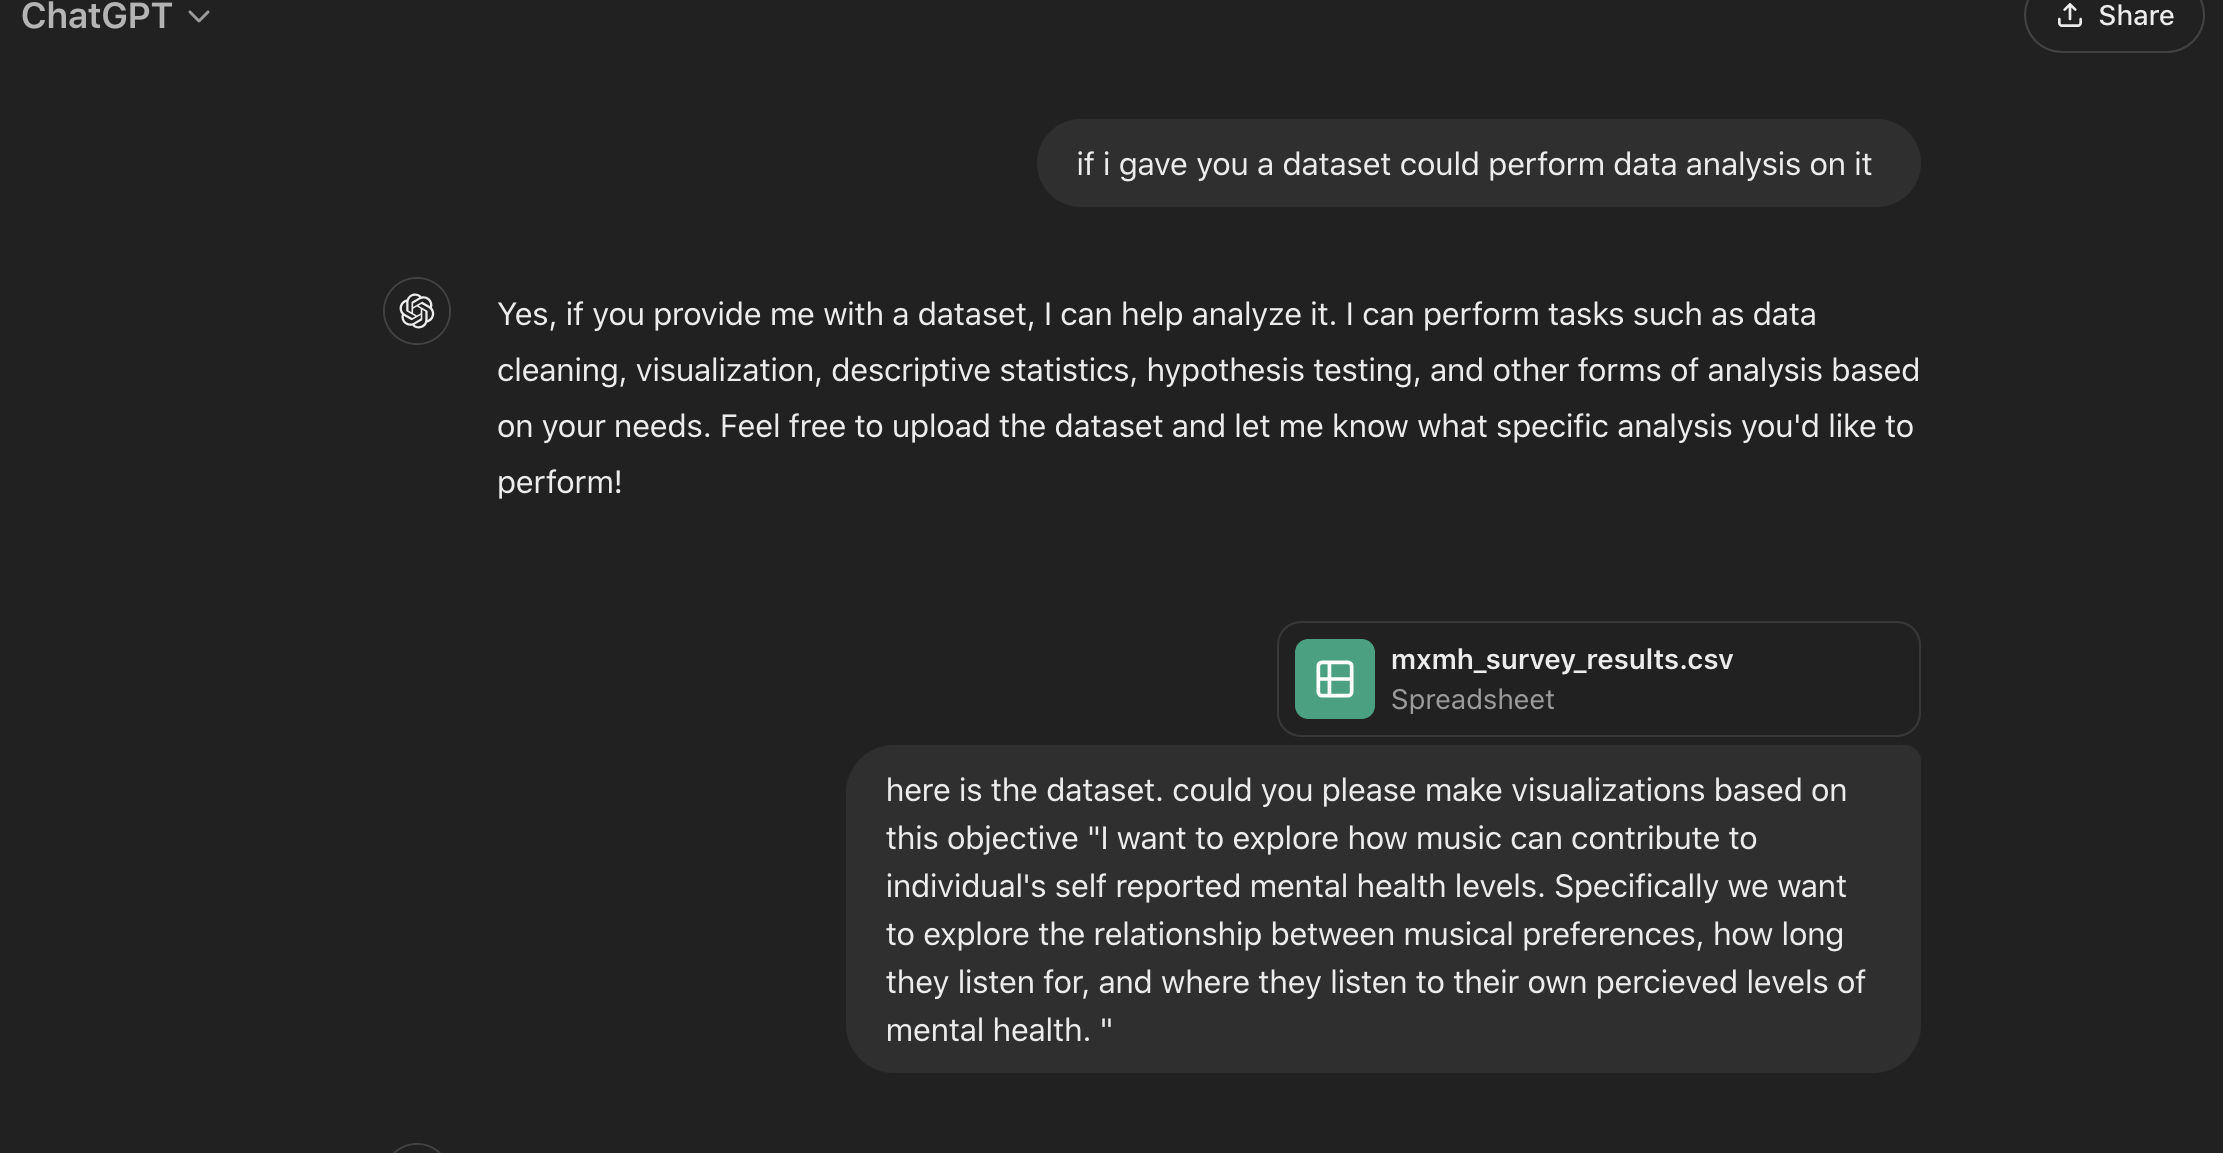

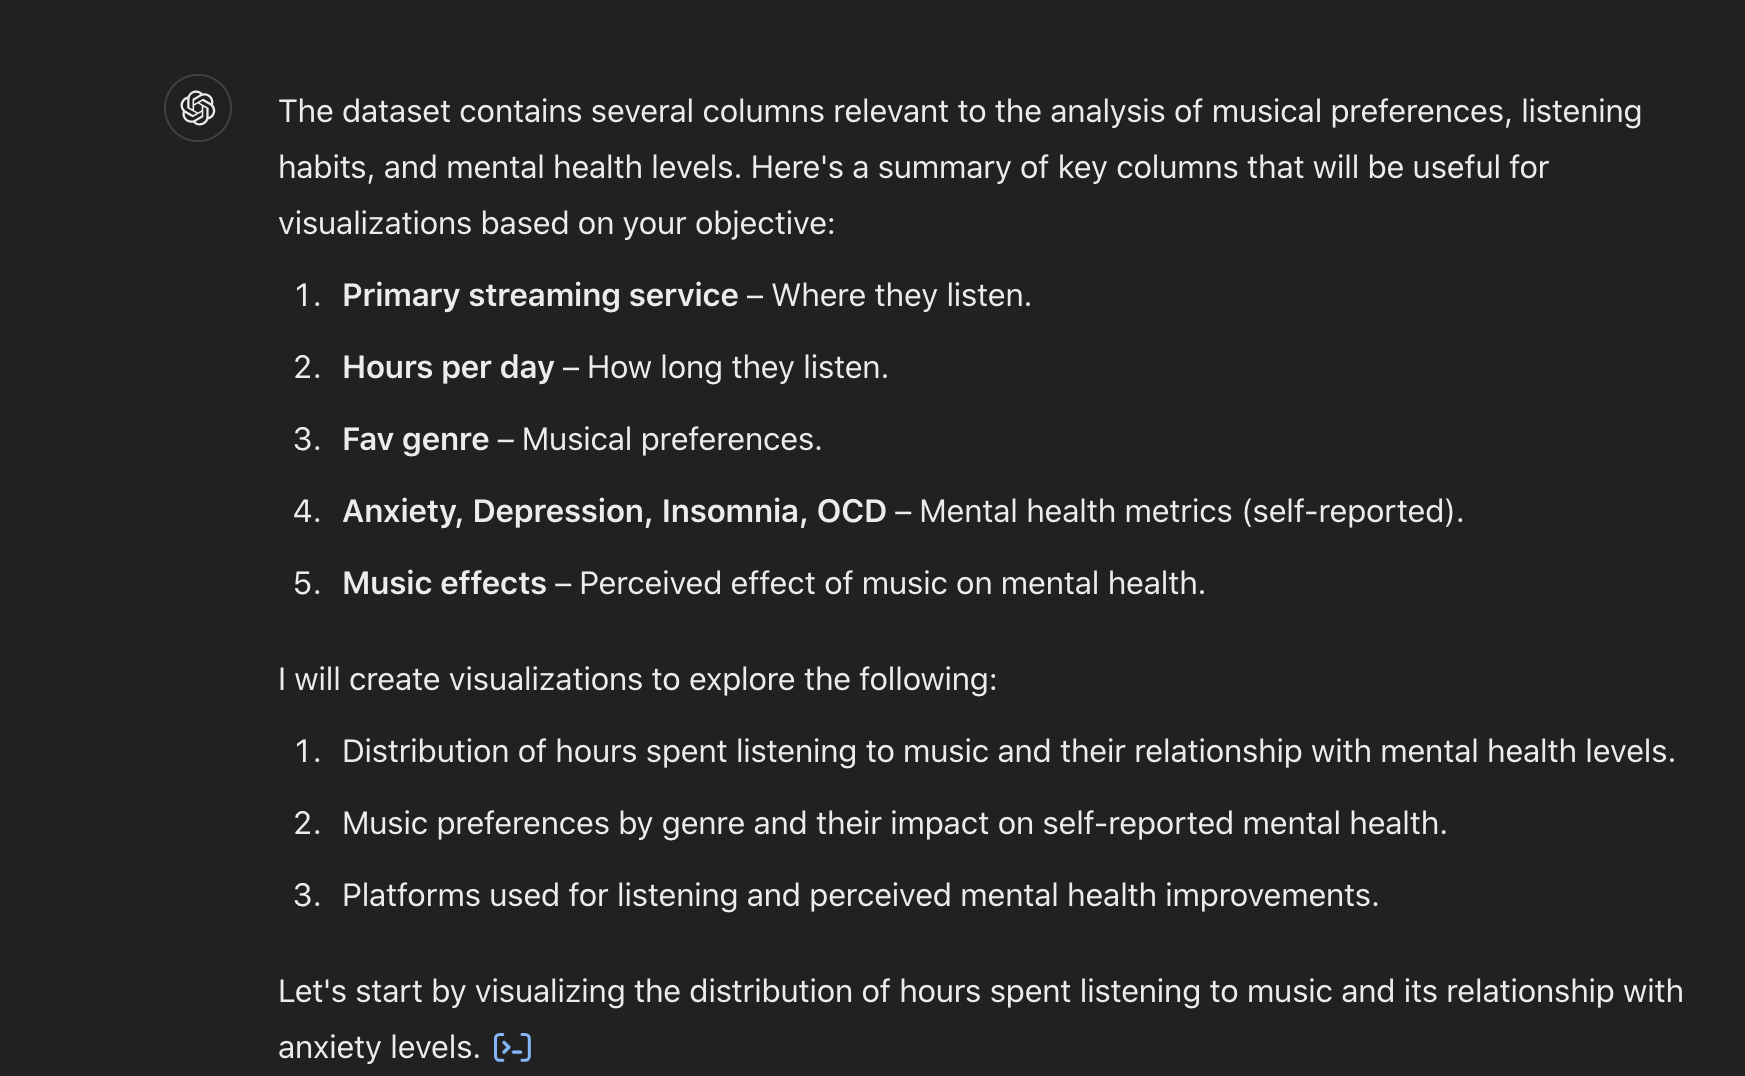

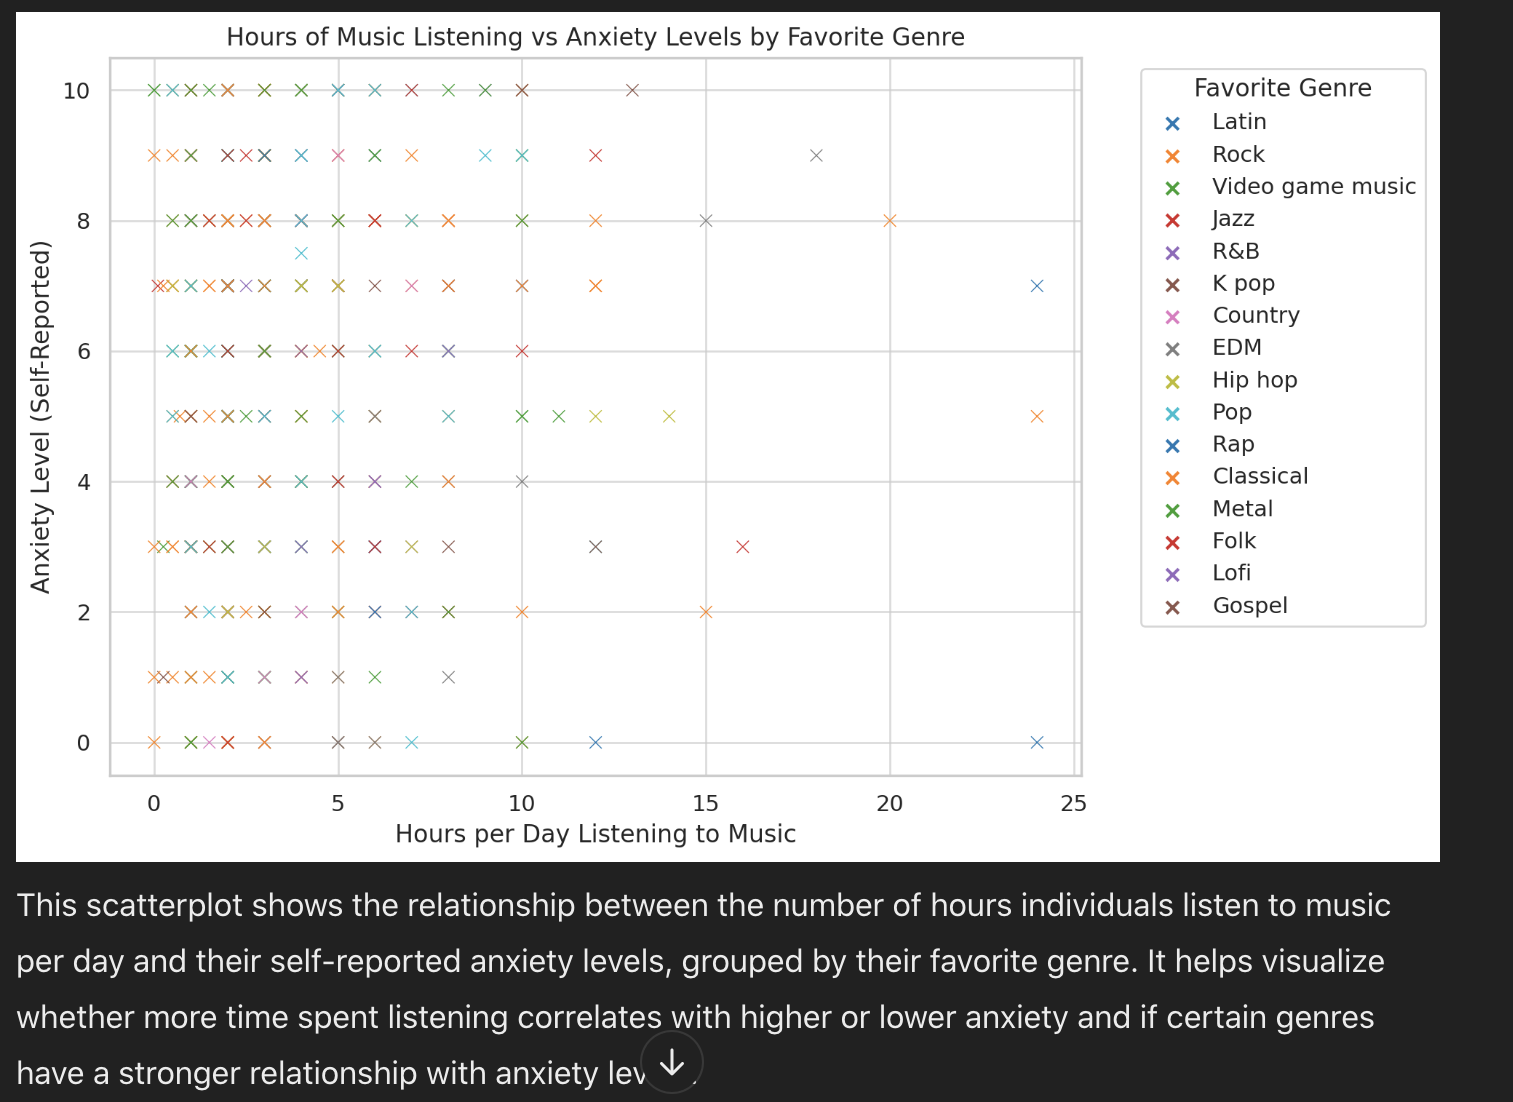

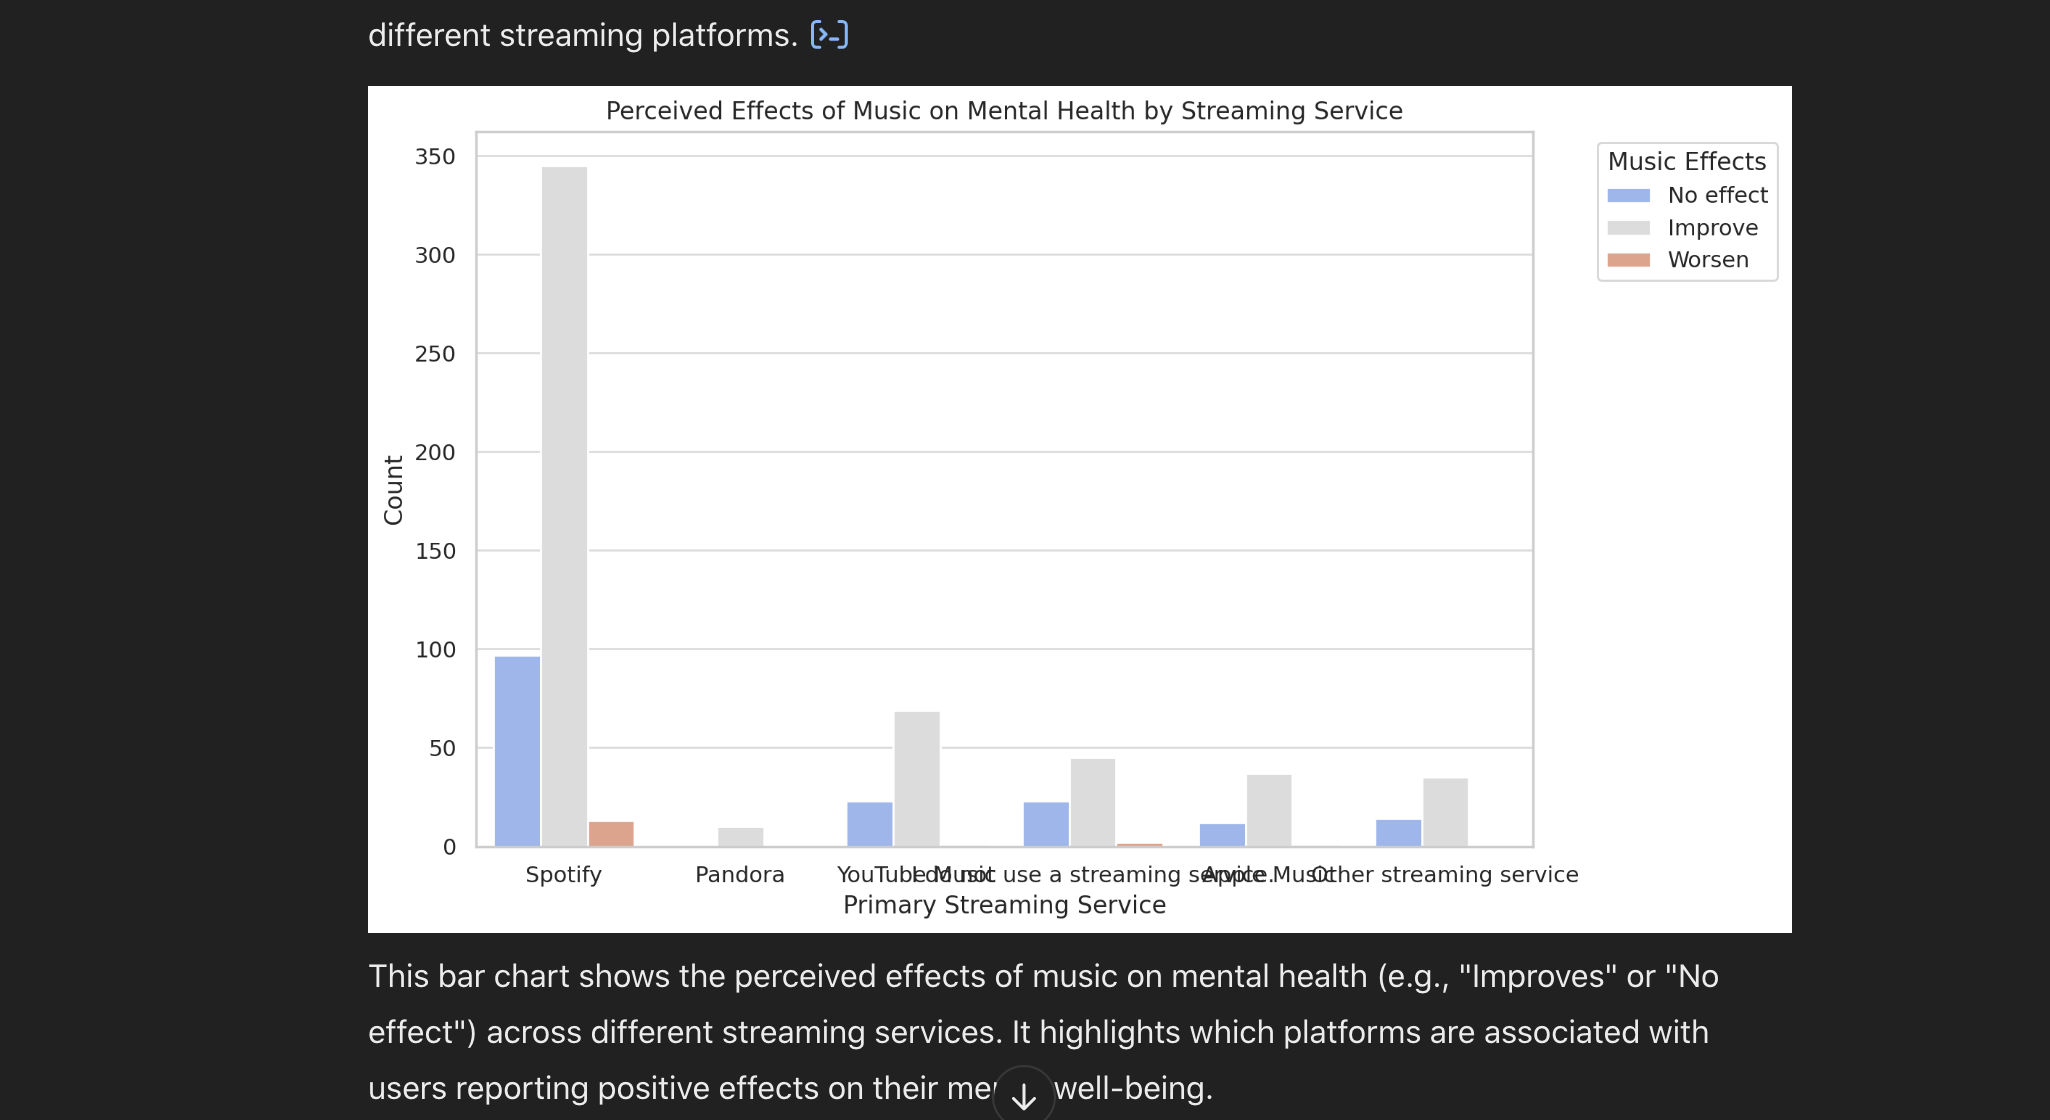

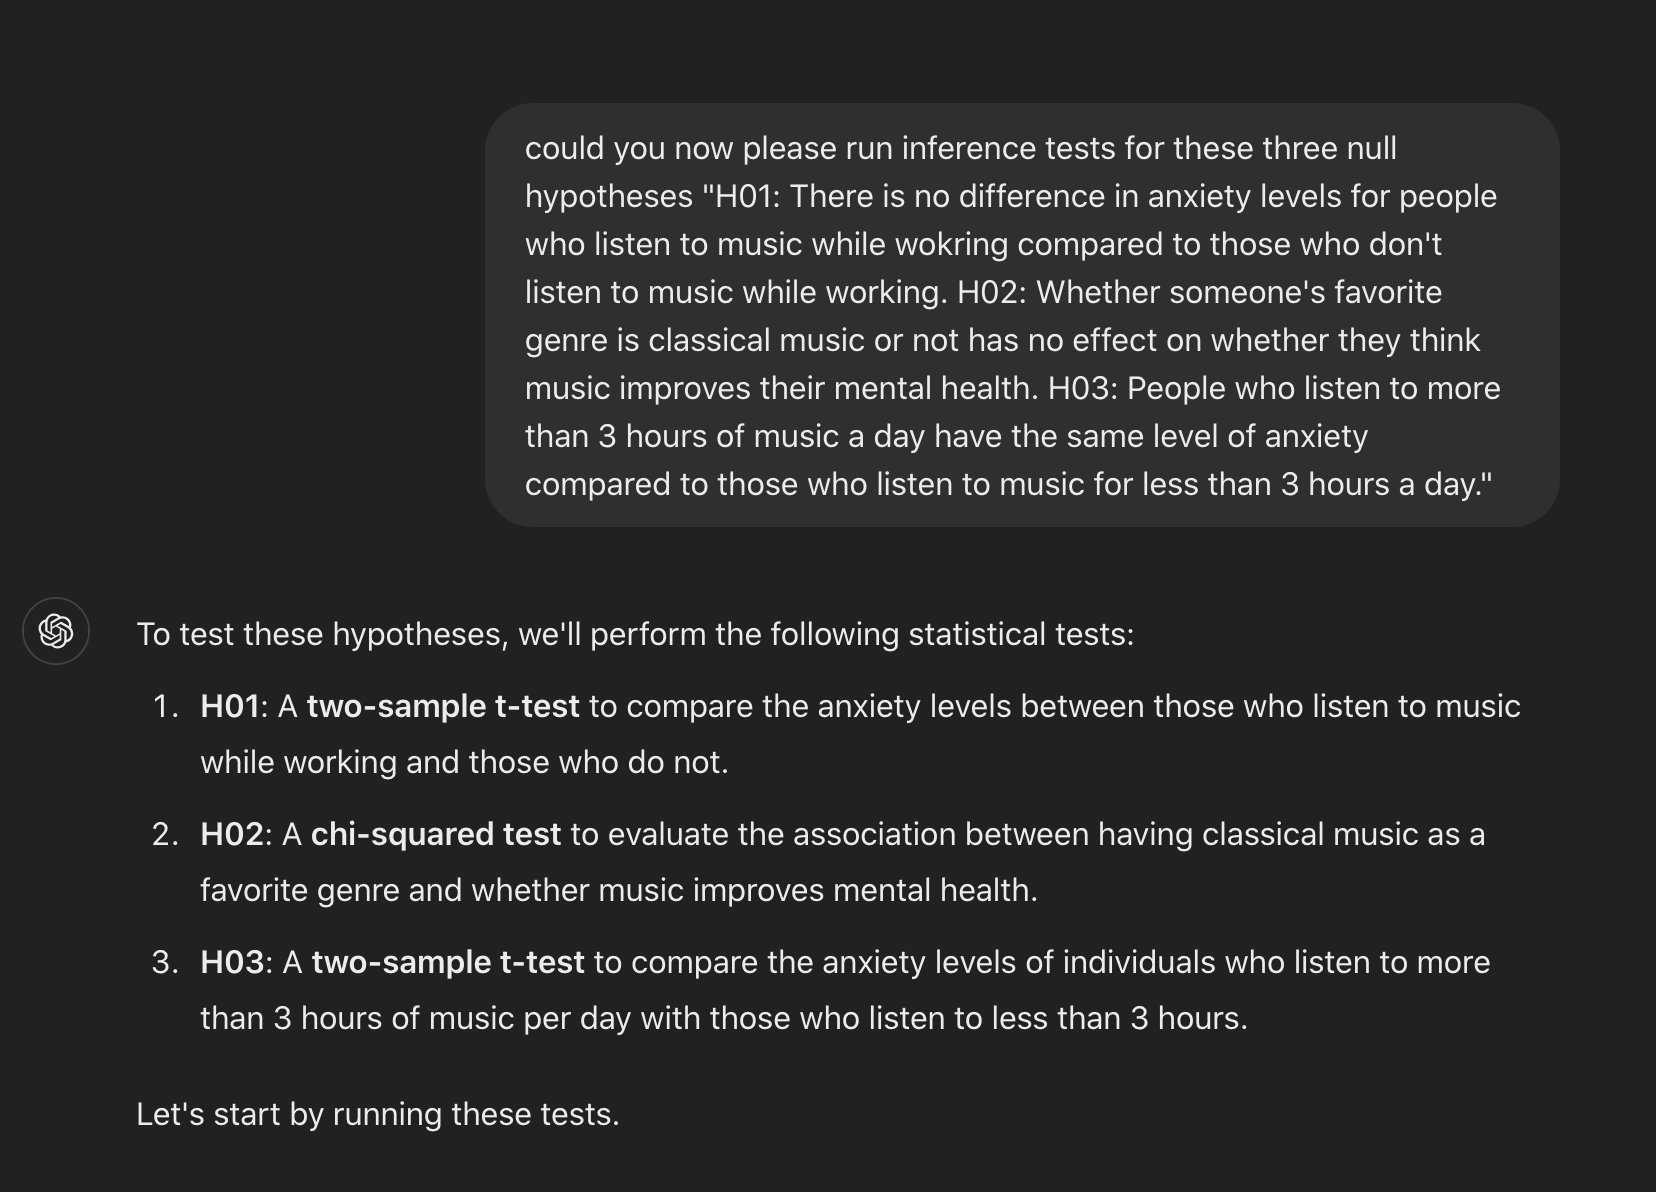

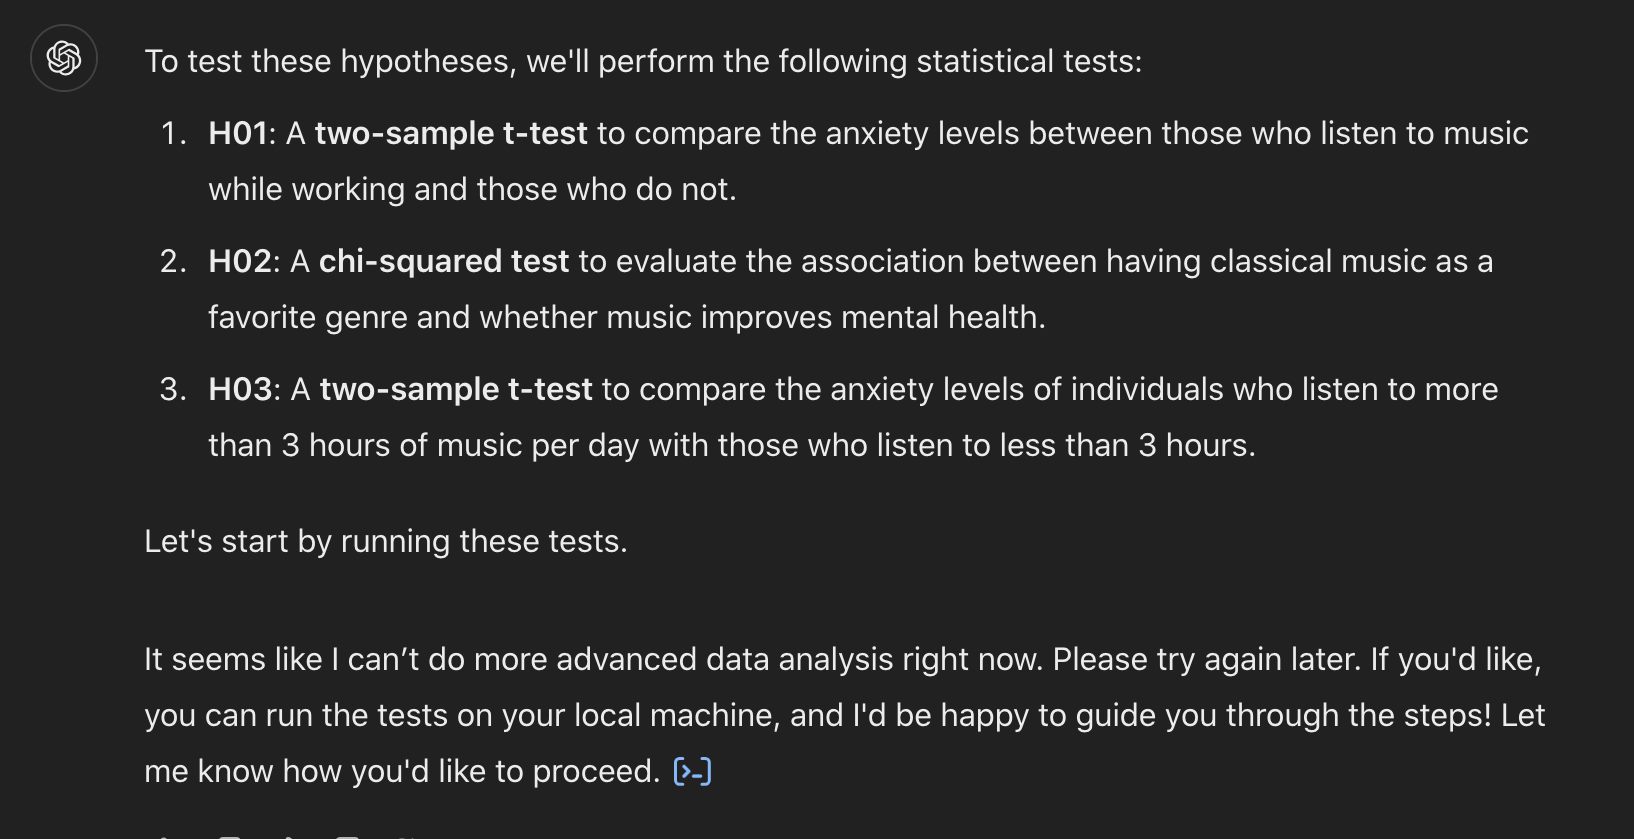

As you can see in the screenshot I ran out of free data analysis so I moved to co-pilot and go these results.

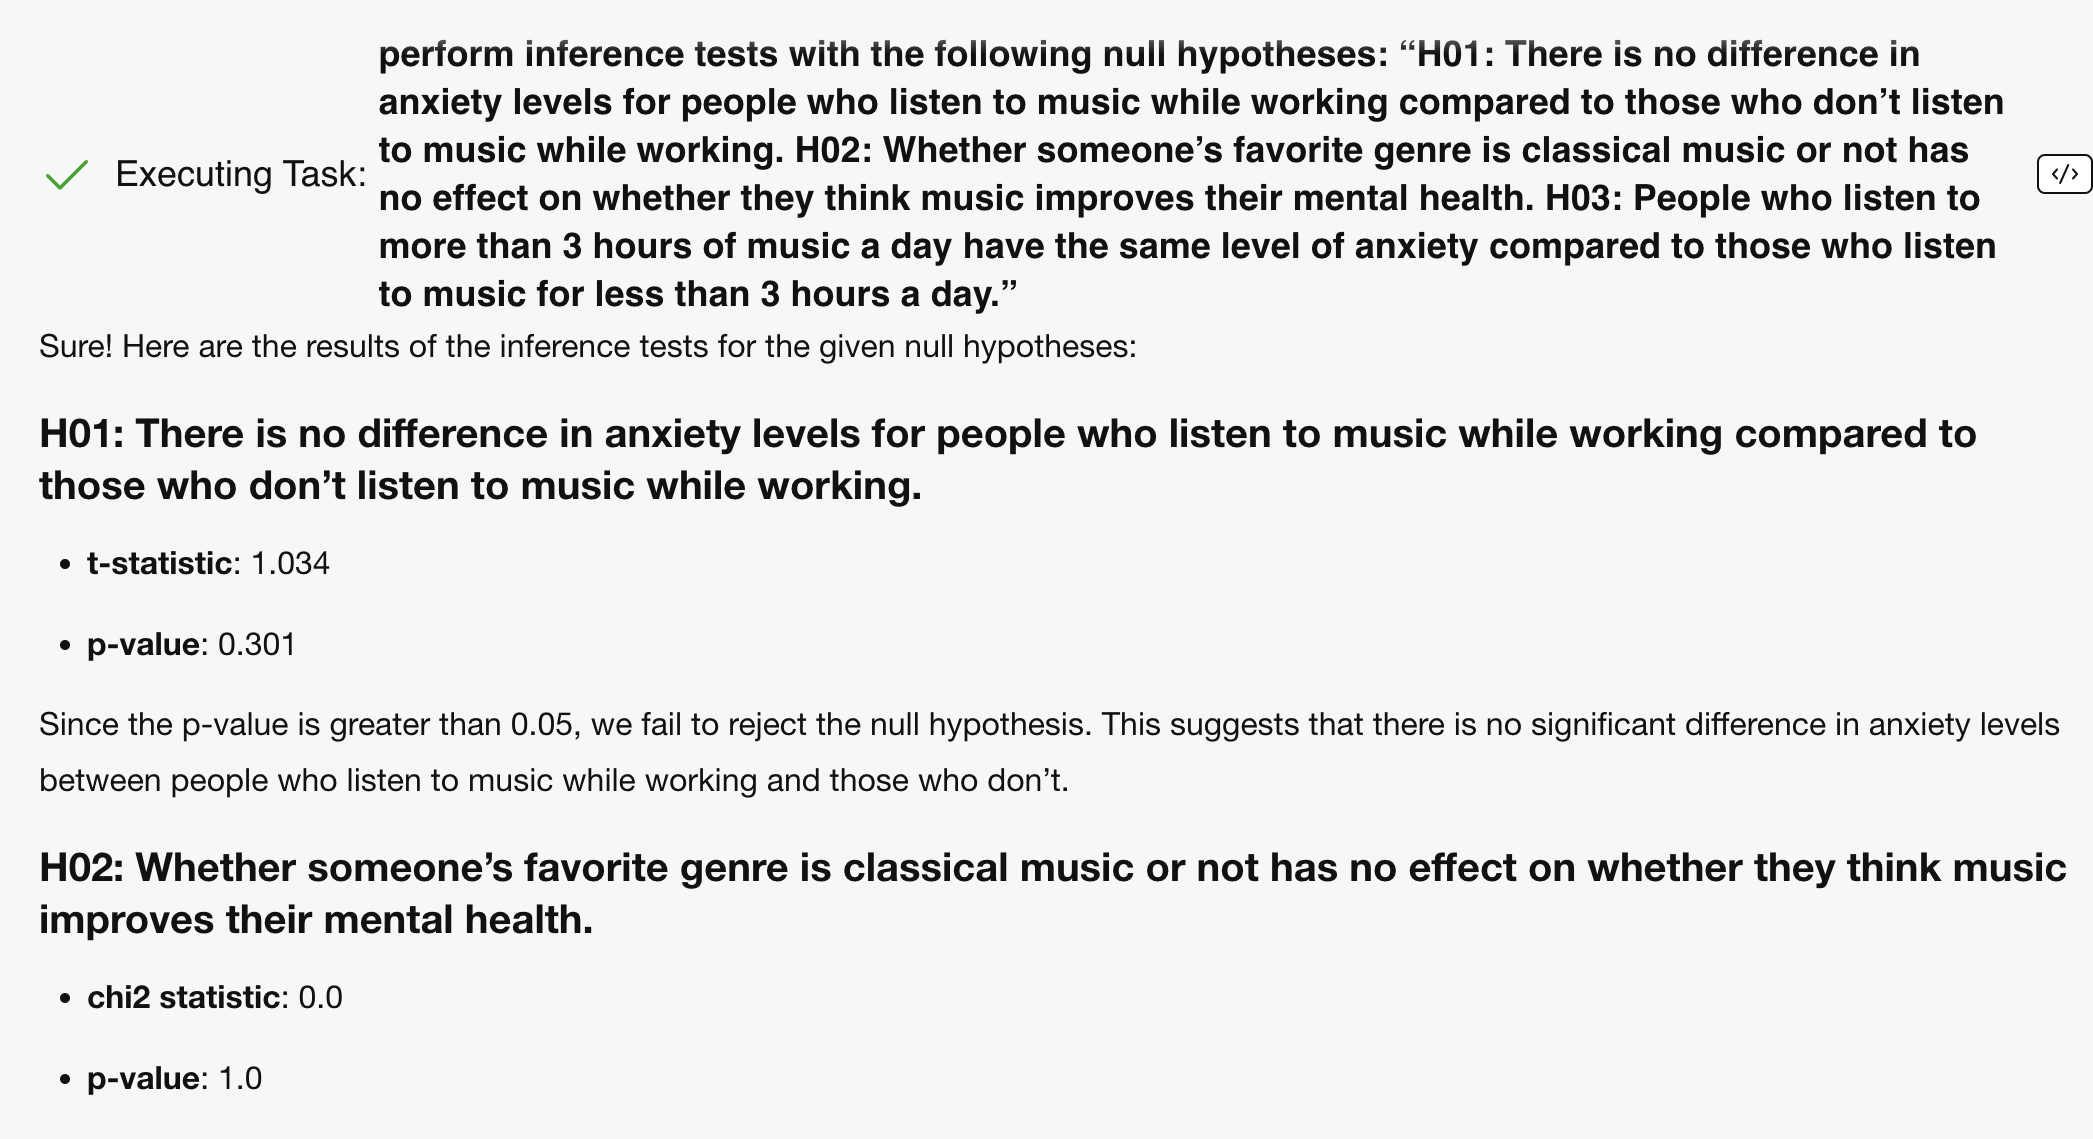

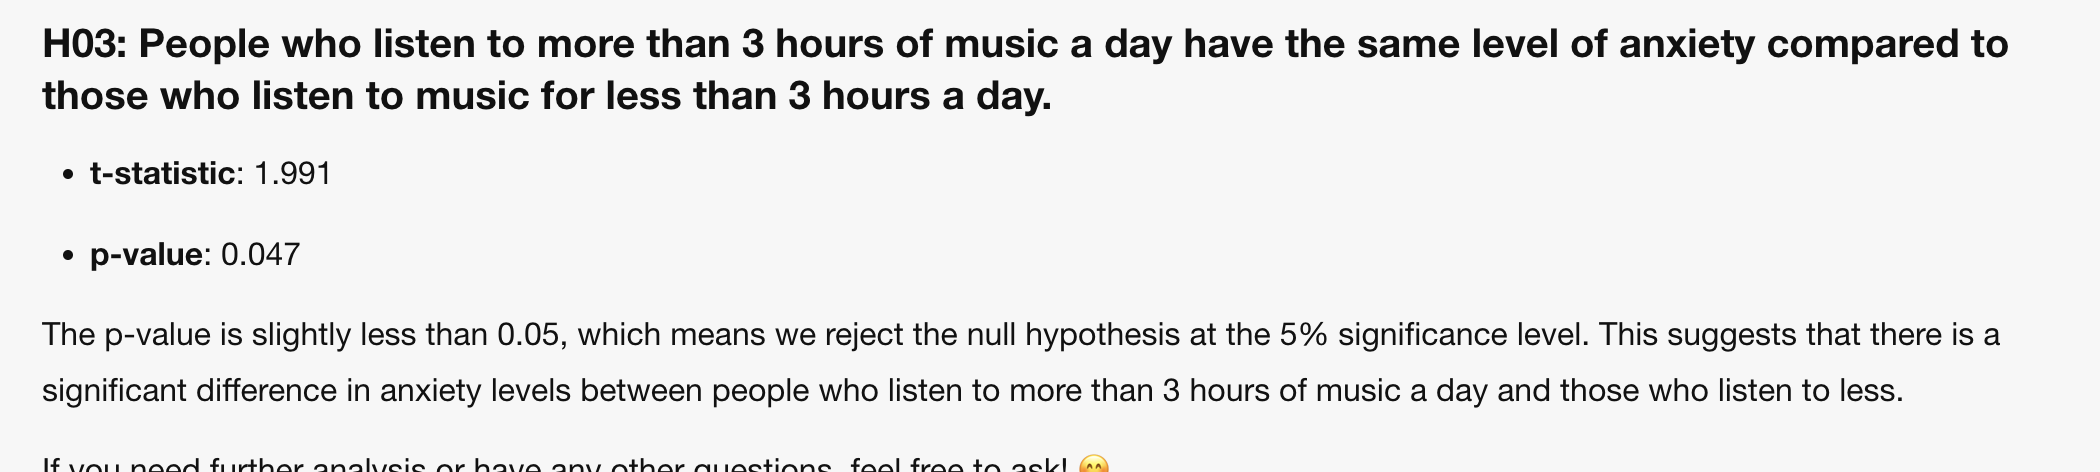